## OBJECTIVE 
* To conduct an EDA on the Credit data to analyze who are the defaulters and who are the non defaulters. The goal also includes which of the defaulters are getting the loan approved and which of the non defaulters are getting their loans rejected. Both the cases cause the banks losses.

* The approach is to keep the data as authentic as possible and only deal with the outliers and missing values when urgently required. This method is practiced as there are possibilities that these outliers are indicators of defaulters.

### Importing the required libraries

In [416]:
#Importing the required libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt


In [417]:
# To help display plt plots and graphs output 
%matplotlib inline

In [418]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

### Viewing and getting information from the data




In [419]:
#Maximising the view of the rows and coloums since dataset is large
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [420]:
#Reading application_data.csv file as app_data and previous_application.csv file as pre_app
pre_app = pd.read_csv("previous_application.csv")
app_data = pd.read_csv("application_data.csv")

In [421]:
#Viewingthe first 4 rows of app_data
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [422]:
#Finding out the number of rows and columns
app_data.shape

(33011, 122)

In [423]:
#Finding out the information of the app_data
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33011 entries, 0 to 33010
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 30.7+ MB


In [424]:
#Finding out the description of the coloumns of the app_data
app_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   33011.000000  33011.000000  33011.000000      3.301100e+04   
mean   119207.042471      0.080640      0.416073      1.719701e+05   
std     11060.673839      0.272285      0.722768      6.506173e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    109620.000000      0.000000      0.000000      1.125000e+05   
50%    119254.000000      0.000000      0.000000      1.467000e+05   
75%    128794.500000      0.000000      1.000000      2.025000e+05   
max    138255.000000      1.000000      9.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.301100e+04   33011.000000     3.298400e+04   
mean   5.995780e+05   27136.602011     5.390546e+05   
std    4.025613e+05   14668.179195     3.701127e+05   
min    4.500000e+04    2052.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.147775e+05   24957.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                33011.000000  33011.000000   33011.000000   
mean                     0.020769 -16043.260398   64329.701433   
std                      0.013774   4359.734752  141725.655339   
min                      0.000533 -25182.000000  -16365.000000   
25%                      0.010006 -19687.500000   -2779.000000   
50%                      0.018850 -15769.000000   -1221.000000   
75%                      0.028663 -12379.000000    -282.000000   
max                      0.072508  -7680.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE    FLAG_MOBIL  \
count       33011.000000     33011.000000  11248.000000  33011.000000   
mean        -4965.102875     -2987.608615     12.050053      0.999970   
std          3520.318643      1511.405954     11.808664      0.005504   
min        -21244.000000     -6228.000000      0.000000      0.000000   
25%         -7430.000000     -4293.000000      5.000000      1.000000   
50%         -4469.000000     -3250.000000      9.000000      1.000000   
75%         -1993.000000     -1717.000000     15.000000      1.000000   
max             0.000000         0.000000     65.000000      1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count    33011.000000     33011.000000      33011.000000  33011.000000   
mean         0.818424         0.199206          0.997758      0.277877   
std          0.385500         0.399410          0.047294      0.447959   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      1.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  33011.000000     33011.000000          33011.000000   
mean       0.055436         2.156584              2.050377   
std        0.228833         0.909634              0.507539   
min        0.000000         1.000000              1.000000   
25%        0.000000         2.000000              2.000000   
50%        0.000000         2.000000              2.000000   
75%        0.000000         3.000000              2.000000   
max        1.000000        10.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                 33011.000000             33011.000000   
mean                      2.029839                12.069431   
std                       0.501606                 3.235598   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       

In [425]:
#Finding out all the column's name
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Removing the app_data coloumns with more than 40% null values



In [426]:
# Finding the the null values of each colomn, divinding it by the length of the colomns, multiplying it by 100 to get the null values in percentage, rounding the percentage to two decimal place and sorting the values in descending order
round(app_data.isnull().sum()/len(app_data)* 100, 2).sort_values(ascending = False)

COMMONAREA_MODE                 70.08
COMMONAREA_AVG                  70.08
COMMONAREA_MEDI                 70.08
NONLIVINGAPARTMENTS_MODE        69.56
NONLIVINGAPARTMENTS_AVG         69.56
NONLIVINGAPARTMENTS_MEDI        69.56
LIVINGAPARTMENTS_MEDI           68.60
LIVINGAPARTMENTS_AVG            68.60
LIVINGAPARTMENTS_MODE           68.60
FONDKAPREMONT_MODE              68.57
FLOORSMIN_MODE                  67.92
FLOORSMIN_AVG                   67.92
FLOORSMIN_MEDI                  67.92
YEARS_BUILD_MEDI                66.64
YEARS_BUILD_MODE                66.64
YEARS_BUILD_AVG                 66.63
OWN_CAR_AGE                     65.93
LANDAREA_MEDI                   59.50
LANDAREA_AVG                    59.50
LANDAREA_MODE                   59.50
BASEMENTAREA_MEDI               58.44
BASEMENTAREA_MODE               58.44
BASEMENTAREA_AVG                58.44
EXT_SOURCE_1                    56.42
NONLIVINGAREA_MODE              55.03
NONLIVINGAREA_AVG               55.03
NONLIVINGARE

In [427]:
# Storing the series in Res
res = round(app_data.isnull().sum()/len(app_data)* 100, 2).sort_values(ascending = False)

In [428]:
#Converting the series into a dictionary and filtering the dictionary to keep only those columns with values of more than 40
Res= dict(res)

Dlist = {}
for key,value in Res.items():
  if value > 40:
    Dlist[key] = value


In [429]:
# Storing keys of the Dlist in a list as the names of columns with more than 40% null values
To_Drop=list(Dlist.keys())


In [430]:
# Dropping the columns with more than 40% missing values
New_app_data = app_data.drop(To_Drop, axis=1)

In [431]:
#Checking the new data
New_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [432]:
#Checking that all the columns with more than 40 % are removed
round(New_app_data.isnull().sum()/len(app_data)* 100, 2).sort_values(ascending = False)


OCCUPATION_TYPE                31.54
EXT_SOURCE_3                   19.77
AMT_REQ_CREDIT_BUREAU_YEAR     13.47
AMT_REQ_CREDIT_BUREAU_QRT      13.47
AMT_REQ_CREDIT_BUREAU_MON      13.47
AMT_REQ_CREDIT_BUREAU_WEEK     13.47
AMT_REQ_CREDIT_BUREAU_DAY      13.47
AMT_REQ_CREDIT_BUREAU_HOUR     13.47
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.35
DEF_30_CNT_SOCIAL_CIRCLE        0.35
OBS_60_CNT_SOCIAL_CIRCLE        0.35
DEF_60_CNT_SOCIAL_CIRCLE        0.35
EXT_SOURCE_2                    0.25
AMT_GOODS_PRICE                 0.08
DAYS_LAST_PHONE_CHANGE          0.01
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [433]:
#Checking the shape of the New_app_data
New_app_data.shape

(33011, 73)

In [434]:
#Checking for duplicates in the SK_ID_CURR
New_app_data.SK_ID_CURR.duplicated().sum()

0

In [435]:
#Checking the names of the coloumns
New_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

## Data Analysis on New_app_data


### Univariate analysis on SET 1 variables

In [436]:
#Calculating the percentage of each Contract Type category. 
New_app_data.NAME_CONTRACT_TYPE.value_counts(normalize= True)

Cash loans         0.904214
Revolving loans    0.095786
Name: NAME_CONTRACT_TYPE, dtype: float64

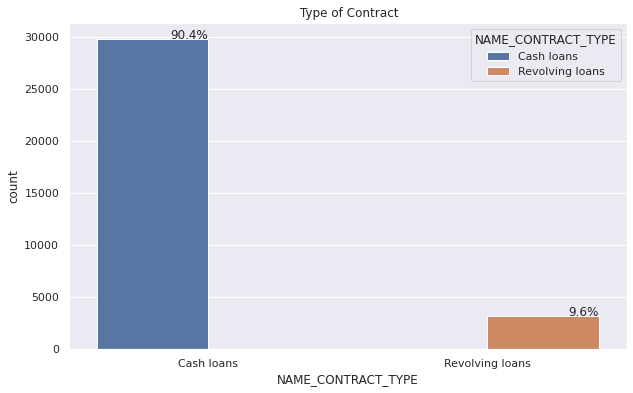

In [437]:
#SET 1 - 1Var

sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_app_data.NAME_CONTRACT_TYPE))
Contract_type = sns.countplot(x='NAME_CONTRACT_TYPE', hue="NAME_CONTRACT_TYPE", data= New_app_data,)
plt.title(' Type of Contract')
#percentage = '{:.1f}%'.format(100 *p.get_height()/total)
for p in Contract_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Contract_type.annotate(percentage, (x, y), ha='right')
plt.show()




* 90% are Cash loans while only 9.4% are Revolving loans

In [438]:
# Replacing F with Female, M with Male and XNA with Others
New_app_data.CODE_GENDER= New_app_data.CODE_GENDER.replace('F', "Female")
New_app_data.CODE_GENDER= New_app_data.CODE_GENDER.replace('M', "Male")
New_app_data.CODE_GENDER= New_app_data.CODE_GENDER.replace('XNA', "Others")


* It is assumed that XNA is for those who do not identify as Male or Female and hence XNA has been classified as Others.

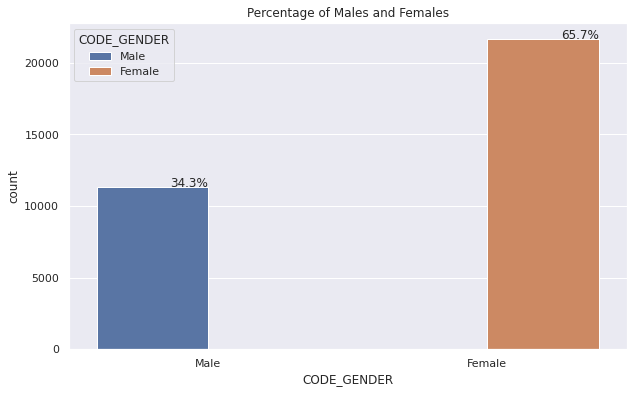

In [439]:
#SET 1- VAR 2
# Running a Bar chart for CODE_GENDER
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_app_data.CODE_GENDER))
Gender_type = sns.countplot(x ='CODE_GENDER', hue="CODE_GENDER", data= New_app_data,)
plt.title('Percentage of Males and Females')

for p in Gender_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Gender_type.annotate(percentage, (x, y), ha='right')
plt.show()




* 65.7% of the Females opt for loans while only 34.3% Males opt for loans.

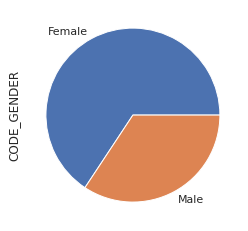

Female    21690
Male      11321
Name: CODE_GENDER, dtype: int64

In [440]:
#Percentage of male and females who applied for loans in a pie chart

New_app_data['CODE_GENDER'].value_counts()/len(New_app_data)*100
New_app_data['CODE_GENDER'].value_counts().plot.pie()
plt.show()

New_app_data['CODE_GENDER'].value_counts()

In [441]:
# Replacing the N with NO CAR and Y with Have Car
New_app_data.FLAG_OWN_CAR= New_app_data.FLAG_OWN_CAR.replace('N', "No Car")
New_app_data.FLAG_OWN_CAR= New_app_data.FLAG_OWN_CAR.replace('Y', "Have Car")

In [442]:
#Checking the number of those who have no car and those who have a car 
New_app_data.FLAG_OWN_CAR.value_counts()

No Car      21762
Have Car    11249
Name: FLAG_OWN_CAR, dtype: int64

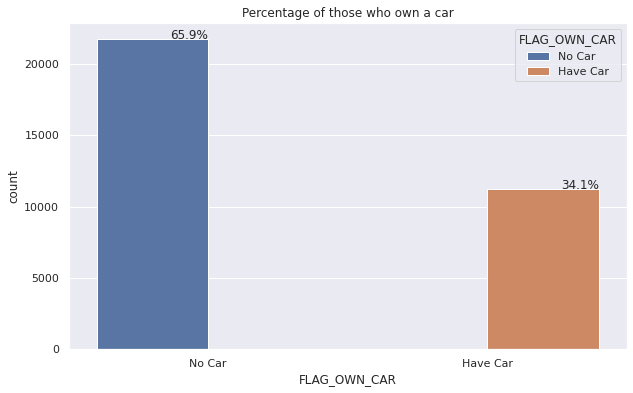

In [443]:
#SET 1 VAR3
# Running a bar chart for FLAG_OWN_CAR
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_app_data.FLAG_OWN_CAR))
OwnCar_type = sns.countplot(x='FLAG_OWN_CAR', hue="FLAG_OWN_CAR", data= New_app_data,)
plt.title('Percentage of those who own a car')

for p in OwnCar_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    OwnCar_type.annotate(percentage, (x, y), ha='right')
plt.show()


*65.9% of the customers do not own a car while only 34.1% have a car.

In [444]:
#Replacing N with No Realty and Y with Yes Realty
New_app_data.FLAG_OWN_REALTY= New_app_data.FLAG_OWN_REALTY.replace('N', "No Realty")
New_app_data.FLAG_OWN_REALTY= New_app_data.FLAG_OWN_REALTY.replace('Y', "Yes Realty")

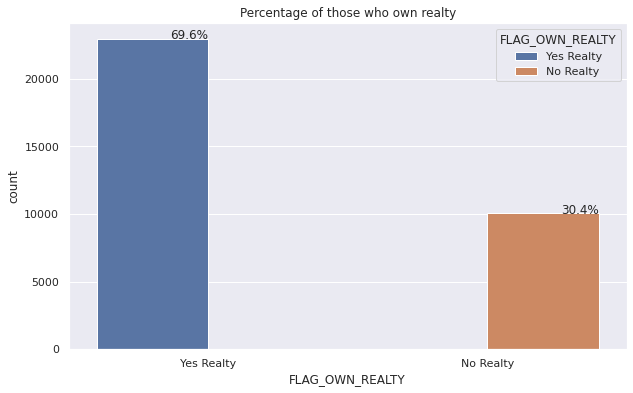

In [445]:
#SET 1 Var4
# Running a bar chart for FLAG_OWN_REALTY
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_app_data.FLAG_OWN_REALTY))
OwnRealty_type = sns.countplot(x='FLAG_OWN_REALTY', hue="FLAG_OWN_REALTY", data= New_app_data,)
plt.title('Percentage of those who own realty')
#percentage = '{:.1f}%'.format(100 *p.get_height()/total)
for p in OwnRealty_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    OwnRealty_type.annotate(percentage, (x, y), ha='right')
plt.show()





* However 69% of the customers have realty while 30.6% do not have any realty.

In [446]:
#Replacing 1 for Defaulter and 0 for Non_Defaulter
New_app_data.TARGET= New_app_data.TARGET.replace(1, "Defaulter")
New_app_data.TARGET = New_app_data.TARGET.replace(0, "Non_Defaulter")

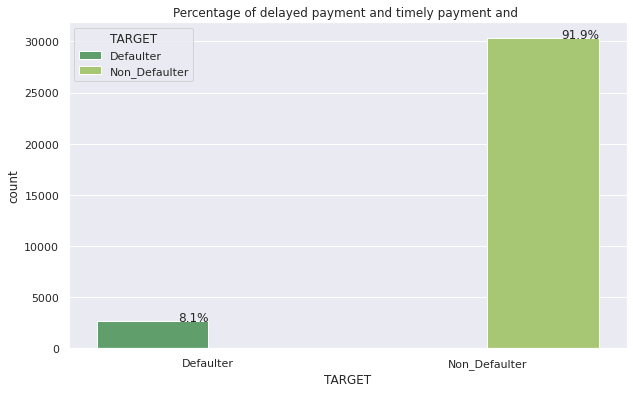

In [447]:
#SET 1 Var 5
# Running a bar chart for TARGET
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_app_data.TARGET))
Target_type = sns.countplot(x='TARGET', hue="TARGET", data= New_app_data, palette="summer")
plt.title('Percentage of delayed payment and timely payment and ')
#percentage = '{:.1f}%'.format(100 *p.get_height()/total)
for p in Target_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Target_type.annotate(percentage, (x, y), ha='right')
plt.show()


* Majority of the customers are non defaulters (91.9%) while only 8.1% are defaulters.
* The data is unbalanced as the ratio of Non defaulters to defaulters is not 1:1. It is 91.9% : 8.1% or 2759 : 242.

In [448]:
# Checking the ratio of non defaulters to defaulters
New_app_data.TARGET.value_counts()

Non_Defaulter    30349
Defaulter         2662
Name: TARGET, dtype: int64

### SET 1 Bivariate Analysis

In [449]:
New_app_data['TARGET']=np.where(New_app_data.TARGET =='Defaulter',1,0)

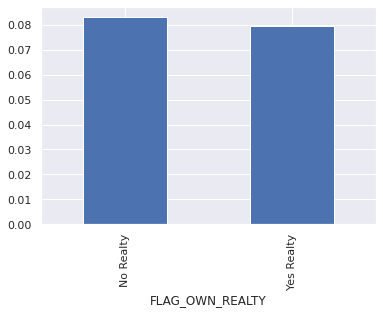

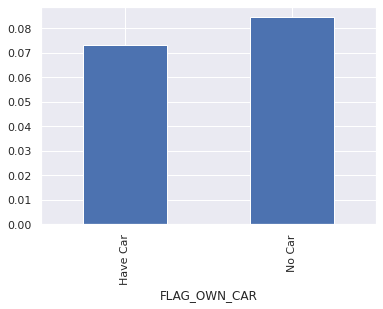

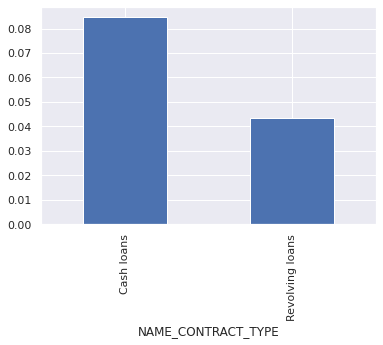

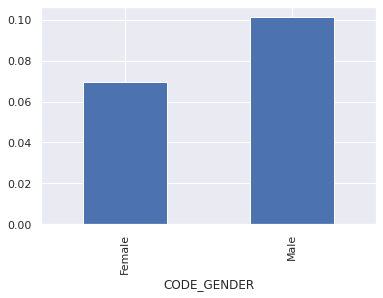

In [450]:
#Ploting the bar graph of Code Gender status,Flag_Own_Car, Flag_Own_Realty, Name_Contract_Type with average value of Target
L={'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR'}

for i in L:
   New_app_data.groupby(New_app_data[i])['TARGET'].mean().plot.bar()
   plt.show()


#This shows that men are more likely to default than women
#Those who took Cash Loans defaulted more but is closely followed by Revolving loans although Revolving loans represents a small portion of Type of loan
#Both Realty owners and non-Realty owners default with non-Reality owners defaulting marginally less.
#Those with no car are marginally likely to default on the loan

* Clients who take out cash loan are more likely to default.
* There isn't much difference in those who have have realty and those who don't. Both are likely to default, but for those with realty, it is marginally less.
* In comparsion to Females, Males are more likely to default.
* Those with no car are likely to default as compared to those who own a car.

## SET 2 Univariate Analysis

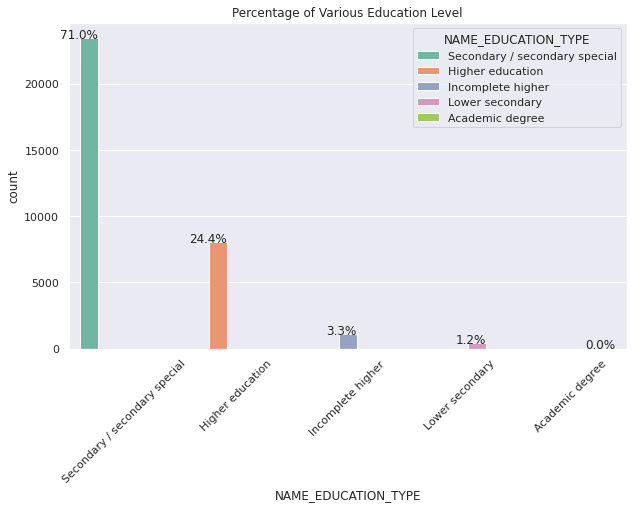

Secondary / secondary special    23450
Higher education                  8058
Incomplete higher                 1082
Lower secondary                    406
Academic degree                     15
Name: NAME_EDUCATION_TYPE, dtype: int64

In [451]:
#SET2 VAR 1
# Running a bar chart for NAME_EDUCATION_TYPE

sns.set(style='darkgrid')

plt.figure(figsize=(10,6))
total = float(len(New_app_data.NAME_EDUCATION_TYPE))
Edu_type = sns.countplot(x='NAME_EDUCATION_TYPE', hue="NAME_EDUCATION_TYPE", data= New_app_data, palette="Set2")
plt.title('Percentage of Various Education Level')
plt.xticks(rotation = 45) 

for p in Edu_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Edu_type.annotate(percentage, (x, y), ha='right')
plt.show()

New_app_data.NAME_EDUCATION_TYPE.value_counts()


* 71.1% of those who have taken a loan have Secondary/ secondary special, followed by 24.4% who have higher education. Highly educated (academic degree) and lowly educated (lower secondary, incomplete higher and secondary) hardly take loans.


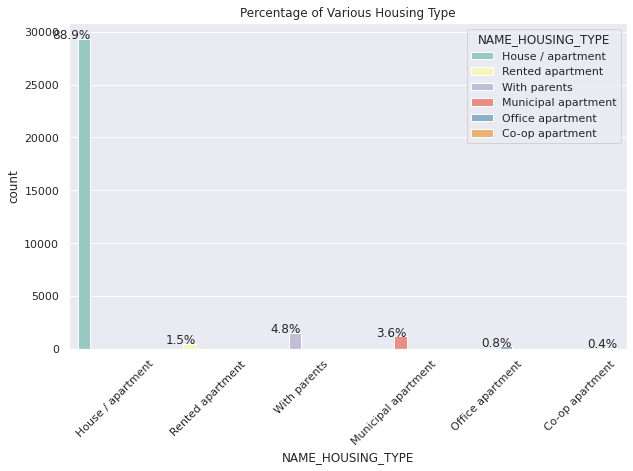

In [452]:
#SET 2 VAR 2
# Running a bar chart for NAME_HOUSING_TYPE
sns.set(style='darkgrid')

plt.figure(figsize=(10,6))
total = float(len(New_app_data.NAME_HOUSING_TYPE))
Housing_type = sns.countplot(x='NAME_HOUSING_TYPE', hue="NAME_HOUSING_TYPE", data= New_app_data, palette="Set3")
plt.title('Percentage of Various Housing Type')
plt.xticks(rotation = 45) 

for p in Housing_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Housing_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 88% of the customer have a house or a appartment.

In [453]:
# Checking the number of Occupation cells left emptry.
New_app_data.OCCUPATION_TYPE.isnull().sum()

10411

* It is assumed that the missing values in the occupation columns are blank because their occupation didn't fit the categories or they are retired. These missing values are being taken as others.

In [454]:
#Replacing missing values in occupation type with others
New_app_data["OCCUPATION_TYPE"].fillna("Others", inplace = True)

In [455]:
#Checking the value count of each category in Occupation type column
New_app_data.OCCUPATION_TYPE.value_counts()

Others                   10411
Laborers                  5886
Sales staff               3452
Core staff                2950
Managers                  2222
Drivers                   1990
High skill tech staff     1232
Accountants               1053
Medicine staff             948
Security staff             741
Cooking staff              622
Cleaning staff             476
Private service staff      300
Low-skill Laborers         253
Waiters/barmen staff       142
Secretaries                137
Realty agents               84
HR staff                    62
IT staff                    50
Name: OCCUPATION_TYPE, dtype: int64

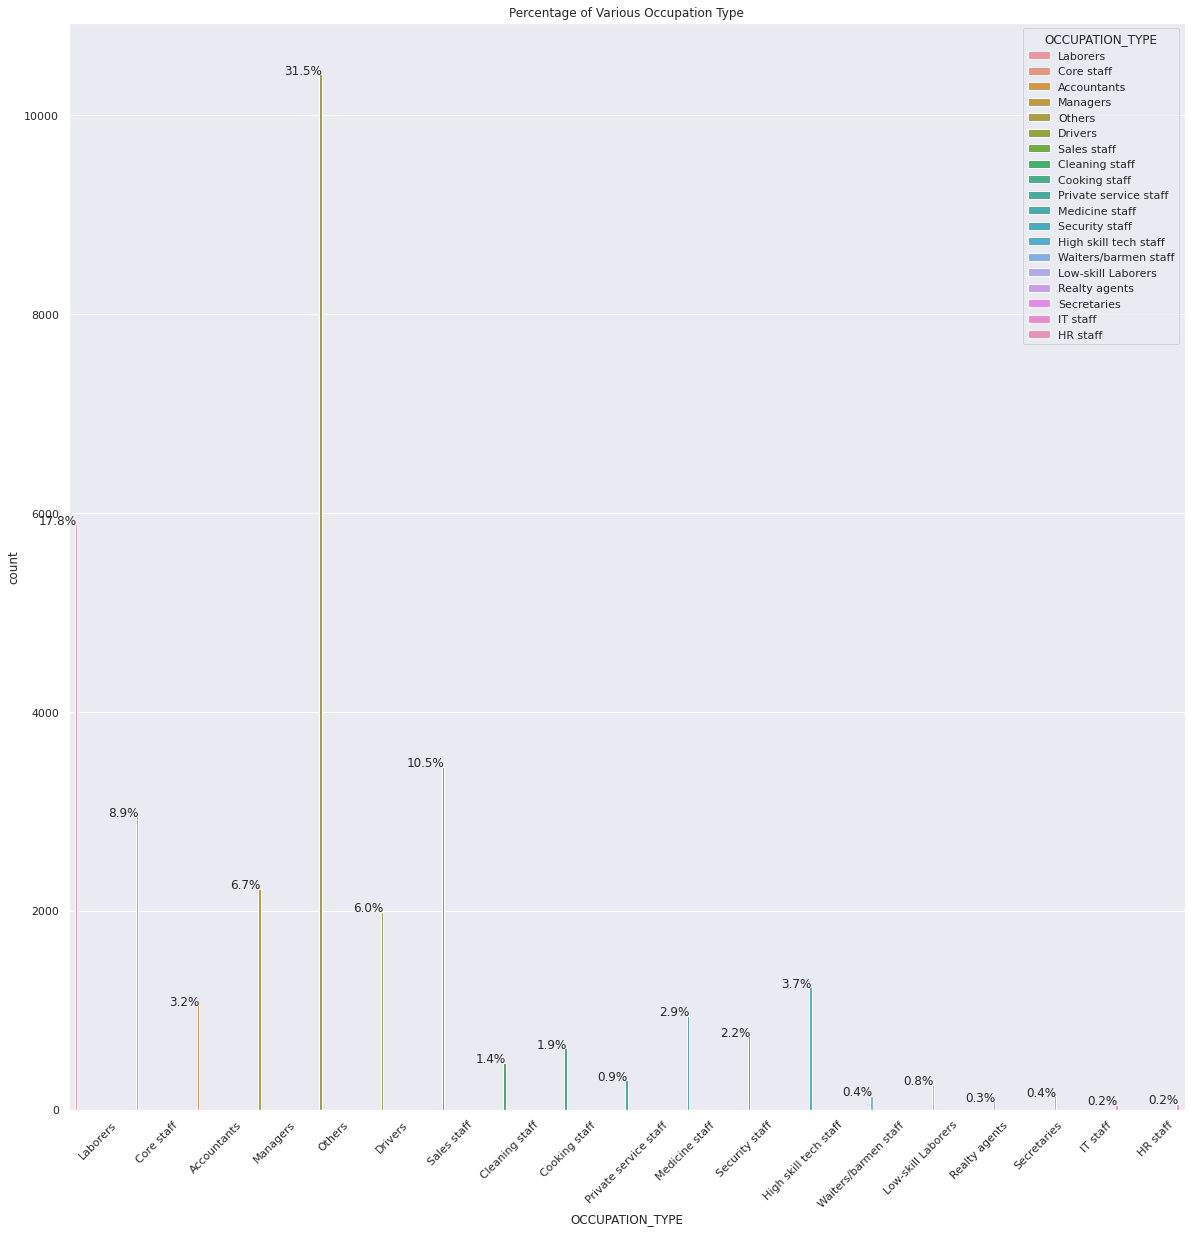

In [456]:
#SET2 VAR3
# Running a bar chart for OCCUPATION_TYPE
sns.set(style='darkgrid')

plt.figure(figsize=(20,20))
total = float(len(New_app_data.OCCUPATION_TYPE))
Ocup_type = sns.countplot(x='OCCUPATION_TYPE', hue="OCCUPATION_TYPE", data= New_app_data)
plt.title('Percentage of Various Occupation Type')
plt.xticks(rotation = 45) 

for p in Ocup_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Ocup_type.annotate(percentage, (x, y), ha='right')
plt.show()

*Those from the 'other' category is 37.3%, followed by labours(17.9)%,     sale staff(10.9%), core staff(8.9%), accountants(7%), drivers(6.1%) and other minor ones.




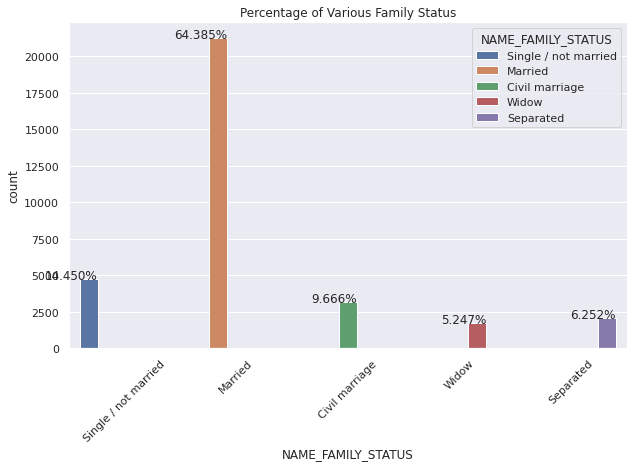

In [457]:
#SET2 Var4
# Running a bar chart for NAME_FAMILY_STATUS
plt.figure(figsize=(10,6))
total = float(len(New_app_data.NAME_FAMILY_STATUS))
Fam_type = sns.countplot(x='NAME_FAMILY_STATUS', hue="NAME_FAMILY_STATUS", data= New_app_data)
plt.title('Percentage of Various Family Status')
plt.xticks(rotation = 45) 

for p in Fam_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Fam_type.annotate(percentage, (x, y), ha='right')
plt.show()


* 64% of the customers are married, while 14% are not married, followed by other categories


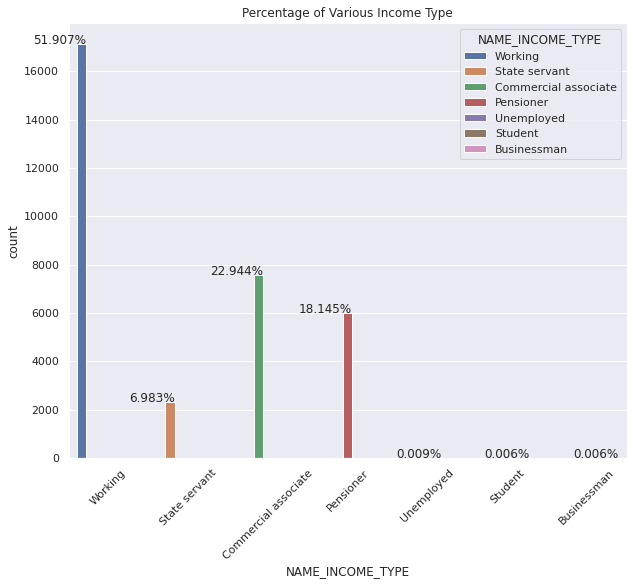

In [458]:
#SET 2 VAR 5
# Running a bar chart for NAME_INCOME_TYPE
sns.set(style='darkgrid')

plt.figure(figsize=(10,8))
total = float(len(New_app_data.NAME_INCOME_TYPE))
Income_type = sns.countplot(x='NAME_INCOME_TYPE', hue="NAME_INCOME_TYPE", data= New_app_data)
plt.title('Percentage of Various Income Type')
plt.xticks(rotation = 45) 

for p in Income_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Income_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 51.9% of the customers are working, 23% are commercial associate, followed by pensioner(17.8%), State servant(7%) and other minor categories.

In [459]:
#checking the new_app_data.columns
New_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### SET 2 Bivariate Analysis 

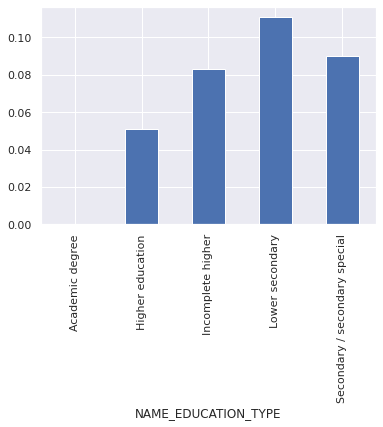

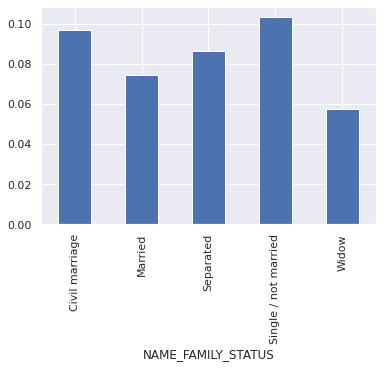

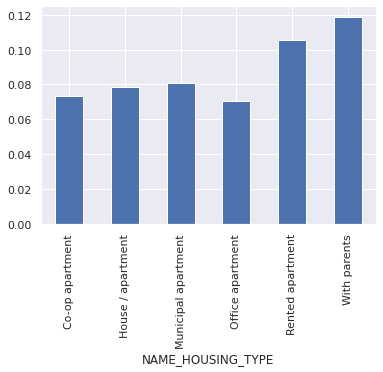

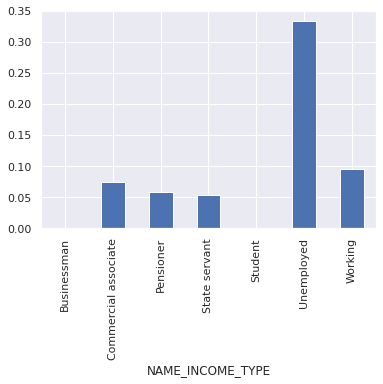

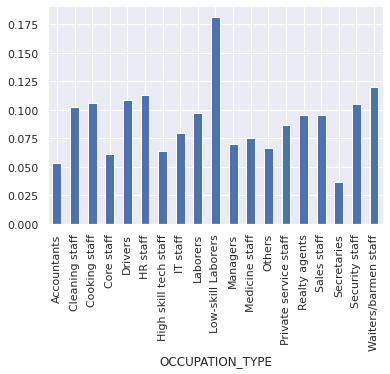

In [460]:
#BIVARIATE ANALYSIS of SET2
# Running a bar chart for the following with TARGET variable

z =["NAME_EDUCATION_TYPE",'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE']
for i in z:
   New_app_data.groupby(New_app_data[i])['TARGET'].mean().plot.bar()
   plt.show()



* Those with Lower Secondary, secondary, incomplete educatation are more likey to default. 
* Those who have civil marriage, single and separated are more likely to default. Married and Widows are less likely to default.
* Those who stay in rented apartment and with parents are more likely to default.
* Unemployed, followed by working professional and corporate are at higher risk of defaulting. Pensioner and State servants are less likely to default.

### SET 3 Univariate Analysis

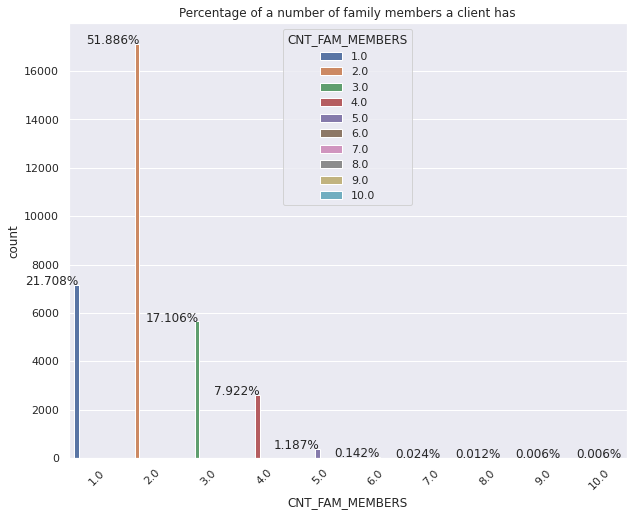

In [461]:
# Running a bar chart for CNT_FAM_MEMBERS
sns.set(style='darkgrid')

plt.figure(figsize=(10,8))
total = float(len(New_app_data.CNT_FAM_MEMBERS))
Fam_type = sns.countplot(x='CNT_FAM_MEMBERS', hue="CNT_FAM_MEMBERS", data= New_app_data)
plt.title('Percentage of a number of family members a client has')
plt.xticks(rotation = 45) 
for p in Fam_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Fam_type.annotate(percentage, (x, y), ha='right')
plt.show()

* About 52% of the customers have 2 members in their family, followed by 22% 
who have one member, 17% who have 3 members and 7% who have 4 members in their family respectively.

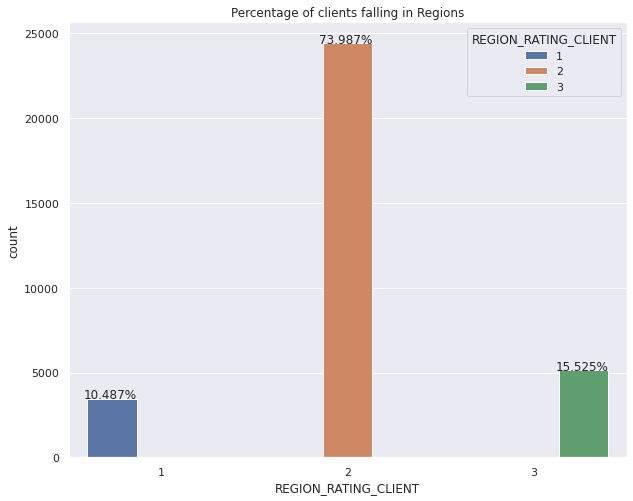

In [462]:
# Running a bar chart for REGION_RATING_CLIENT
sns.set(style='darkgrid')

plt.figure(figsize=(10,8))
total = float(len(New_app_data.REGION_RATING_CLIENT))
Region_type = sns.countplot(x='REGION_RATING_CLIENT', hue="REGION_RATING_CLIENT", data= New_app_data)
plt.title('Percentage of clients falling in Regions')
for p in Region_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Region_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 78% of the clients fall in region rated 2.0, 15% in region rated 15.6% and finally 10% in region rated 1.

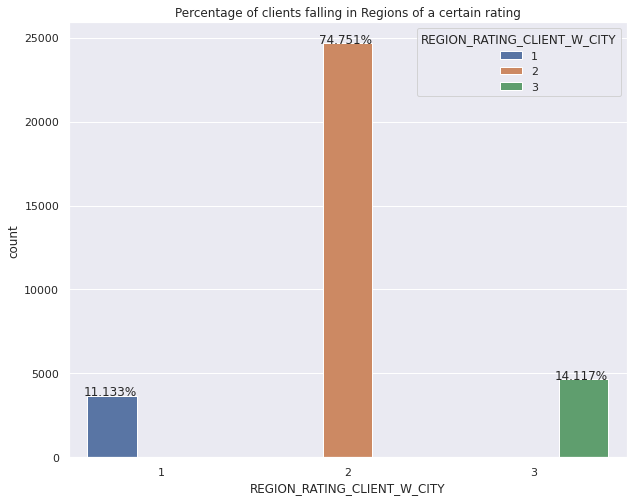

In [463]:
# Running a bar chart for REGION_RATING_CLIENT_W_CITY
sns.set(style='darkgrid')

plt.figure(figsize=(10,8))
total = float(len(New_app_data.REGION_RATING_CLIENT_W_CITY))
Region_C_type = sns.countplot(x='REGION_RATING_CLIENT_W_CITY', hue="REGION_RATING_CLIENT_W_CITY", data= New_app_data)
plt.title('Percentage of clients falling in Regions of a certain rating')
for p in Region_C_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Region_C_type.annotate(percentage, (x, y), ha='right')
plt.show()

* Similar trend can seen here in region rating taking city into account just as it is in the case of region rating.

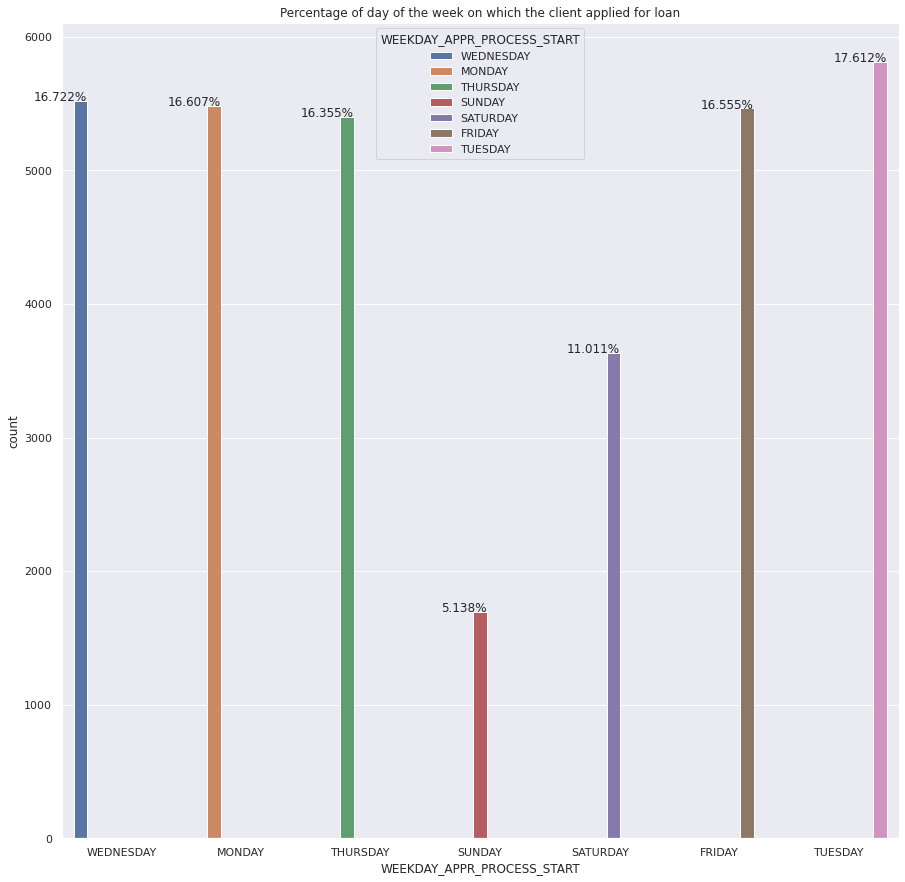

In [464]:
# Running a bar chart for WEEKDAY_APPR_PROCESS_START
sns.set(style='darkgrid')

plt.figure(figsize=(15,15))
total = float(len(New_app_data.WEEKDAY_APPR_PROCESS_START))
WeekDay = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue="WEEKDAY_APPR_PROCESS_START", data= New_app_data)
plt.title('Percentage of day of the week on which the client applied for loan')
for p in WeekDay.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    WeekDay.annotate(percentage, (x, y), ha='right')
plt.show()

*  Clients apply for loan on a Tuesday(17%), followed by Friday, Monday,Wednesday and Thursday (16%). Saturday and Sunday figures could be low as banks generally work half day or are closed in the weekend.

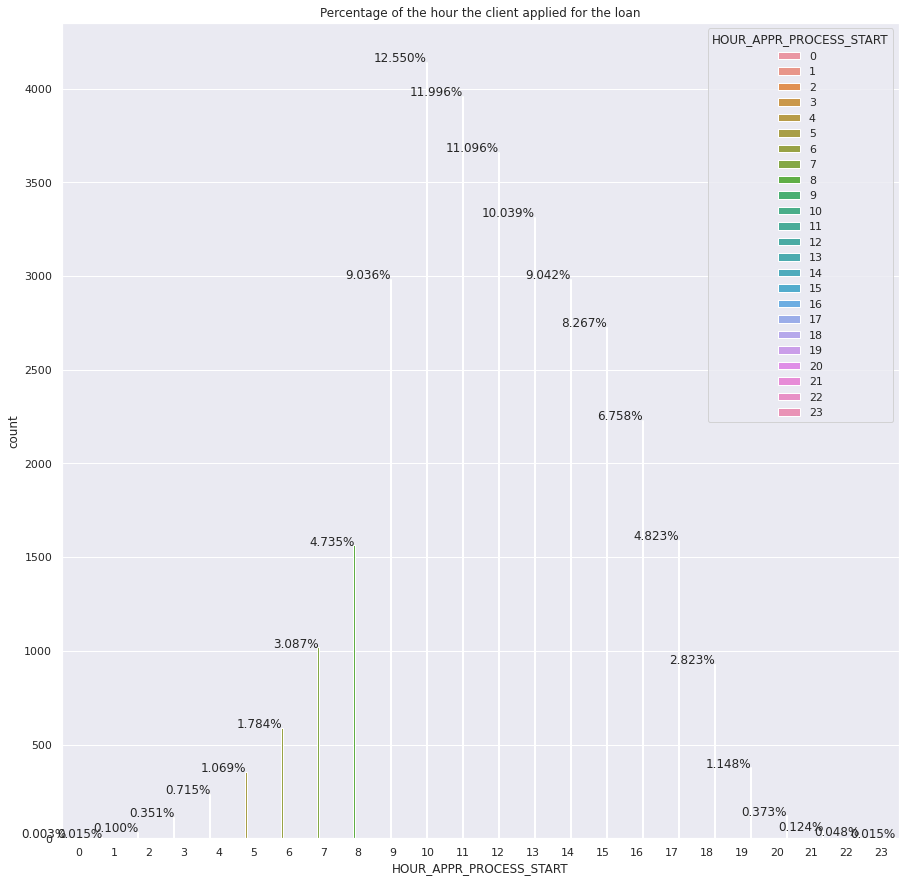

In [465]:
# Running a bar chart for HOUR_APPR_PROCESS_START
sns.set(style='darkgrid')

plt.figure(figsize=(15,15))
total = float(len(New_app_data.HOUR_APPR_PROCESS_START))
Hour_type = sns.countplot(x='HOUR_APPR_PROCESS_START', hue="HOUR_APPR_PROCESS_START", data= New_app_data)
plt.title('Percentage of the hour the client applied for the loan')
for p in Hour_type.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Hour_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 10 am is the most popular hour to apply for loans (17%).Generally from 8am to 5 pm  is when the client applies for loan. This is much in line with the bank working hours.

In [466]:
#Sanity Check 
New_app_data.HOUR_APPR_PROCESS_START.value_counts()

10    4143
11    3960
12    3663
13    3314
14    2985
9     2983
15    2729
16    2231
17    1592
8     1563
7     1019
18     932
6      589
19     379
5      353
4      236
20     123
3      116
21      41
2       33
22      16
1        5
23       5
0        1
Name: HOUR_APPR_PROCESS_START, dtype: int64

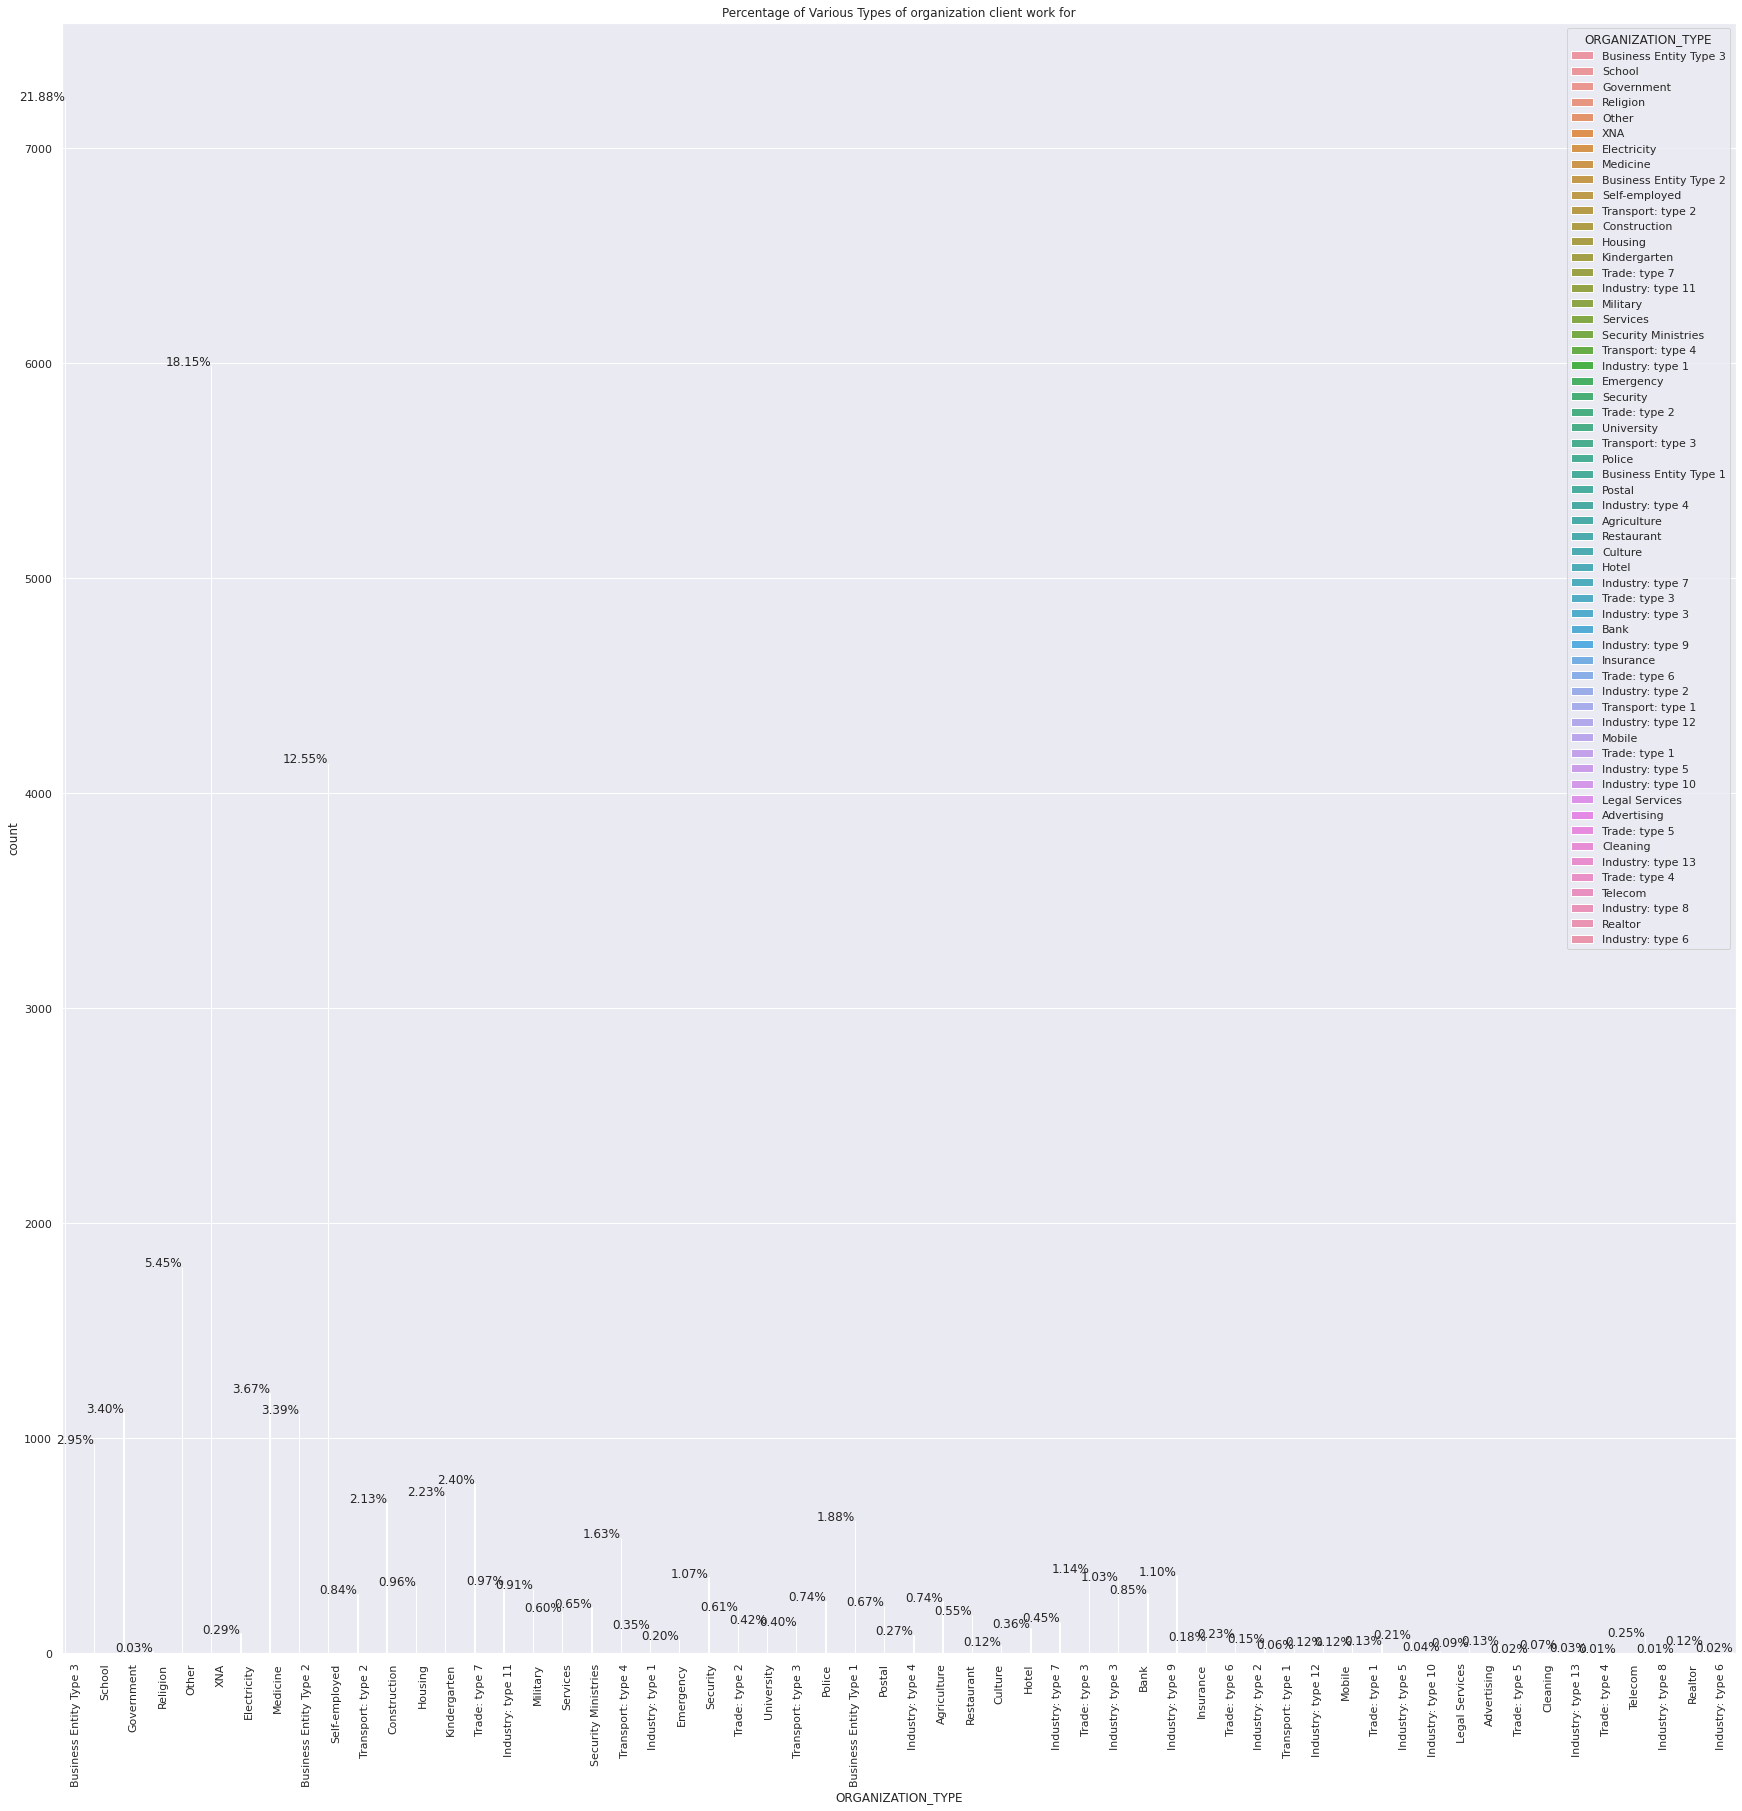

In [467]:
#Ploting a countplot for organization
sns.set(style='darkgrid')

plt.figure(figsize=(30,30))
total = float(len(New_app_data.ORGANIZATION_TYPE))
Org_type = sns.countplot(x='ORGANIZATION_TYPE', hue="ORGANIZATION_TYPE", data= New_app_data)
plt.title('Percentage of Various Types of organization client work for')
plt.xticks(rotation = 90) 
for p in Org_type.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Org_type.annotate(percentage, (x, y), ha='right')
plt.show()

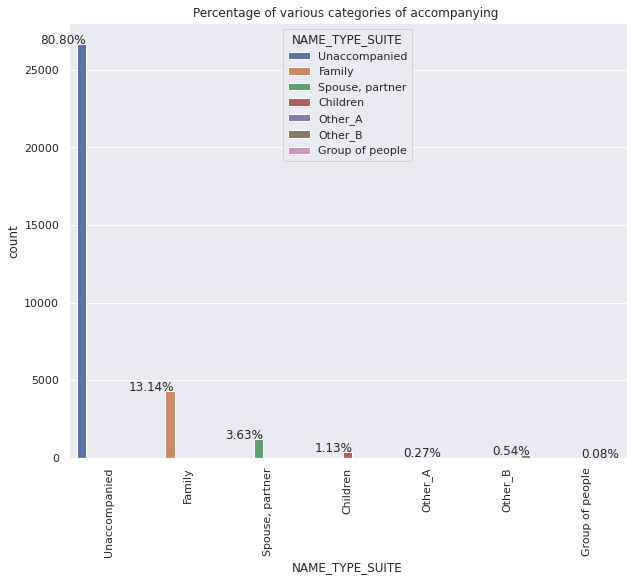

In [468]:
# Plotting a count plot for the Name_Type_Suite
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
total = float(len(New_app_data.NAME_TYPE_SUITE))
suite_type = sns.countplot(x='NAME_TYPE_SUITE', hue="NAME_TYPE_SUITE", data= New_app_data)
plt.title('Percentage of various categories of accompanying ')
plt.xticks(rotation = 90) 
for p in suite_type.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()  
  suite_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 80% came to the bank unaccompanied and 13% came with family.

### SET 3 Bivariate Analysis

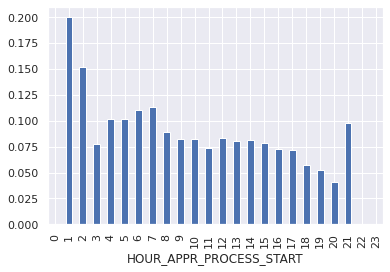

<Figure size 288x288 with 0 Axes>

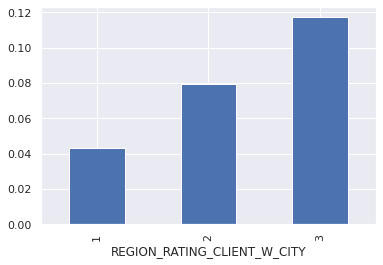

<Figure size 288x288 with 0 Axes>

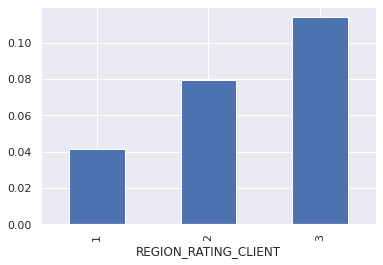

<Figure size 288x288 with 0 Axes>

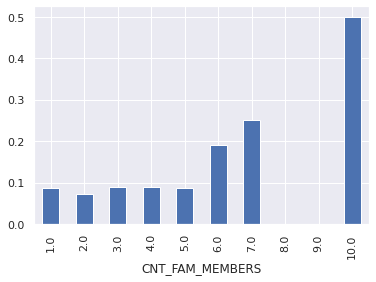

<Figure size 288x288 with 0 Axes>

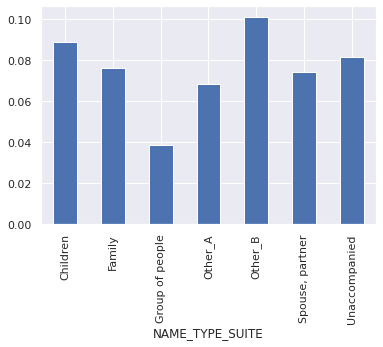

<Figure size 288x288 with 0 Axes>

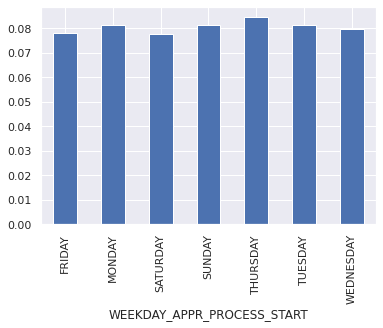

<Figure size 288x288 with 0 Axes>

In [469]:
#Plotting a bar for the following:
z =["HOUR_APPR_PROCESS_START",'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START']
for i in z:
   New_app_data.groupby(New_app_data[i])['TARGET'].mean().plot.bar()
   plt.figure(figsize=(4,4))
   plt.show()



* Clients who apply for a loan at 1am , followed by 2am where highly more likely to default.
* Clients in regions rated as 3 were much likely to default.
* Those who came to apply for the loans unaccompanied, followed by those who came with family are potential defaulters
* Those applying for loans on a Sunday, Wednesday and Thursday more likey to default.

### SET 4 Numerical Variable- Univariate Analysis

In [470]:
Num_list=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

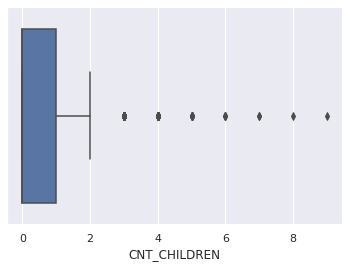

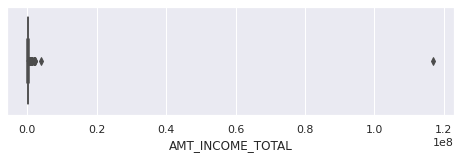

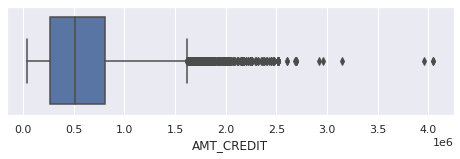

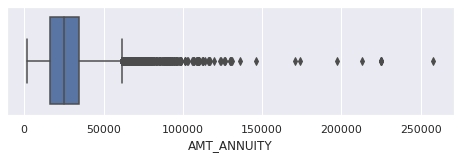

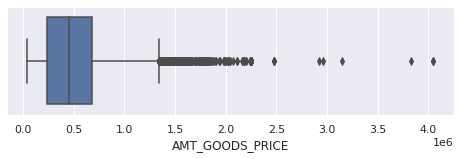

<Figure size 576x144 with 0 Axes>

In [471]:
# Running a boxplot for the following to check for outliers
for i in Num_list:
  sns.boxplot(New_app_data[i])
  plt.figure(figsize=(8,2))
plt.show()



* Usually clients having more than 2 children are outliers. The trend is to have  either no children, one or on the higher side, 2 kids.
* When it comes to income, there are plenty of outliers. Same is the case with credit, loan of the good price and annuity.

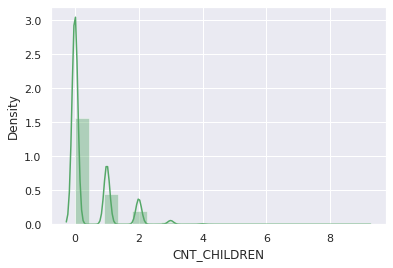

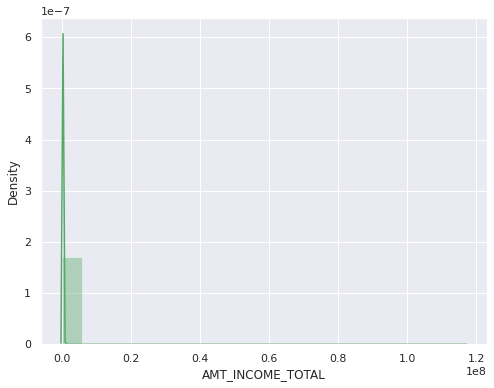

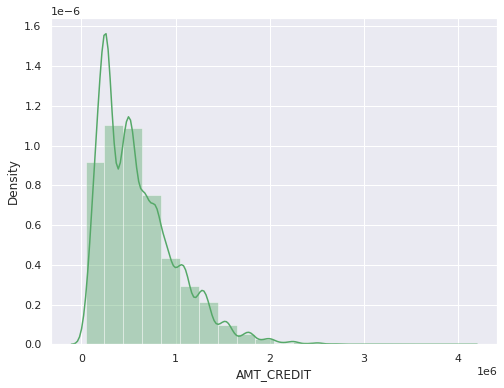

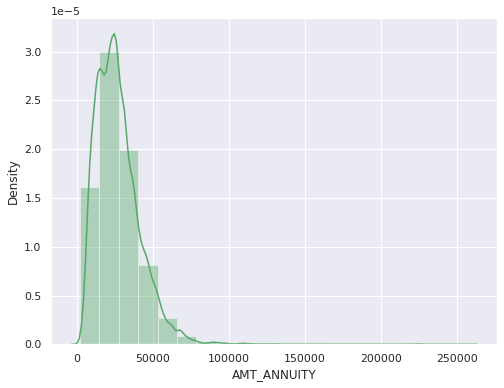

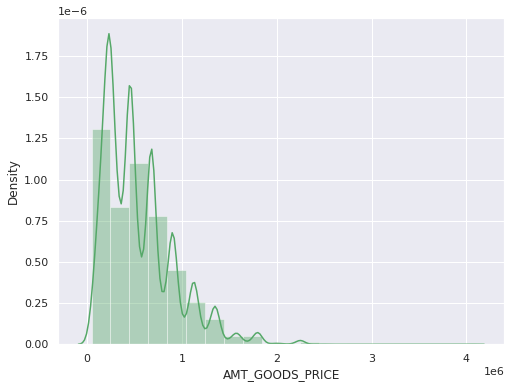

<Figure size 576x432 with 0 Axes>

In [472]:
# Running a distribution plot for the following:
for i in Num_list:
  sns.distplot(New_app_data[i],bins= 20, color="g")
  plt.figure(figsize=(8,6))
plt.show()


* Number of children is mostly are none, followed by 1 and then 2.
* Income is skewed so heavily towards 0.0 on the left side.
* Credit is also skewed to the left side suggesting that people try to take less credit.
* Loan Annuity is also on the left side, much in line with the credit distribution.
* The price of the good for which the loan was taken is also skewed to the left side, in line with the distribution trend of loan annuity and credit.


In [473]:
#Sanity  Check
New_app_data.CNT_CHILDREN.value_counts()

0    23152
1     6563
2     2814
3      416
4       49
5        9
6        4
7        2
8        1
9        1
Name: CNT_CHILDREN, dtype: int64

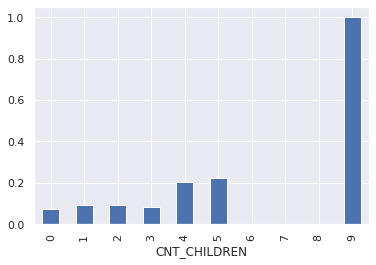

In [474]:
#Plotting the bar for the following:
New_app_data.groupby(New_app_data.CNT_CHILDREN)['TARGET'].mean().plot.bar()
plt.show()


* Those with 4 or more children are likely to default.

In [475]:
# Checking the value count of the number of children. Only one person has 8 kids and one person has 9 kids
New_app_data.CNT_CHILDREN.value_counts()

0    23152
1     6563
2     2814
3      416
4       49
5        9
6        4
7        2
8        1
9        1
Name: CNT_CHILDREN, dtype: int64

In [476]:
# Checking the description of the loan annuity column
New_app_data.AMT_ANNUITY.describe()


count     33011.000000
mean      27136.602011
std       14668.179195
min        2052.000000
25%       16456.500000
50%       24957.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [477]:
# Checking the percentange of value count of loan annuity column
New_app_data.AMT_ANNUITY.value_counts(normalize= True)

9000.0     0.020478
13500.0    0.018388
6750.0     0.007664
10125.0    0.006755
37800.0    0.004786
             ...   
17046.0    0.000030
39033.0    0.000030
29524.5    0.000030
27958.5    0.000030
9994.5     0.000030
Name: AMT_ANNUITY, Length: 7559, dtype: float64

In [478]:
# Checking the description of the credit column
New_app_data.AMT_CREDIT.describe()


count    3.301100e+04
mean     5.995780e+05
std      4.025613e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [479]:
# Checking the description of total income column
New_app_data.AMT_INCOME_TOTAL.describe()



count    3.301100e+04
mean     1.719701e+05
std      6.506173e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.467000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [480]:
# Checking the description of the price of the good for which the loan was taken.
New_app_data.AMT_GOODS_PRICE.describe()


count    3.298400e+04
mean     5.390546e+05
std      3.701127e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

### SET 4 Bivariate Analysis

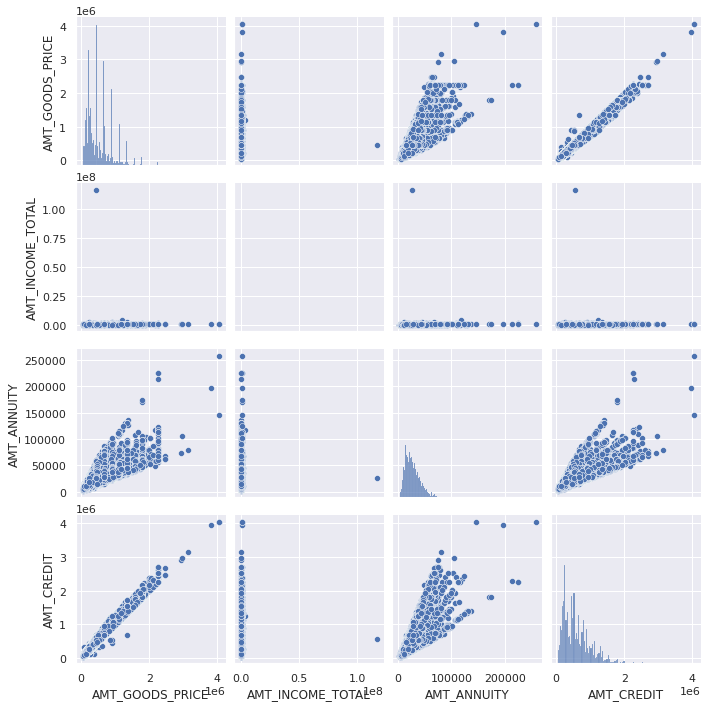

In [481]:
# Conducting a pairplot for the given variables
sns.pairplot(New_app_data[['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_CREDIT']])
plt.show()

#Loan annuity is highly correlated to credit amount of loan
# price of the goods for which the loan is given is highly related to credit amount of the loan
# 

* Loan annuity is highly correlated to credit amount of loan and the Price of the good for which the loan was taken.
* Price of the goods for which the loan is given is highly related to credit amount of the loan.

### Set 5 Univariate Analysis

In [482]:
# Converting Days_Registration values into positive values
New_app_data['DAYS_REGISTRATION'] = New_app_data['DAYS_REGISTRATION'].abs()

In [483]:
# Converting DAYS_ID_PUBLISH values into positive values
New_app_data['DAYS_ID_PUBLISH'] = New_app_data['DAYS_ID_PUBLISH'].abs()

In [484]:
# Converting DAYS_EMPLOYED values into positive values
New_app_data['DAYS_EMPLOYED'] = New_app_data['DAYS_EMPLOYED'].abs()

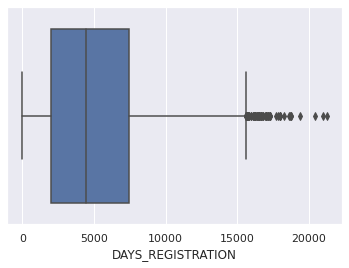

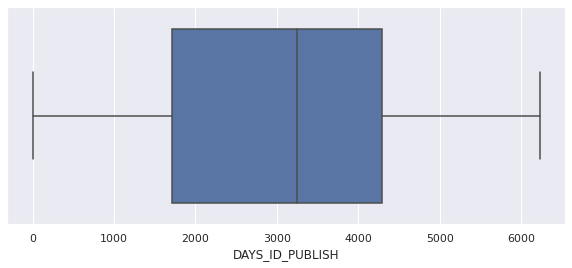

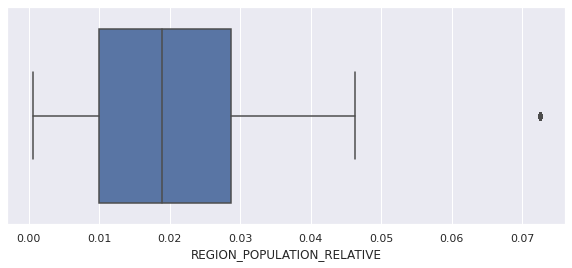

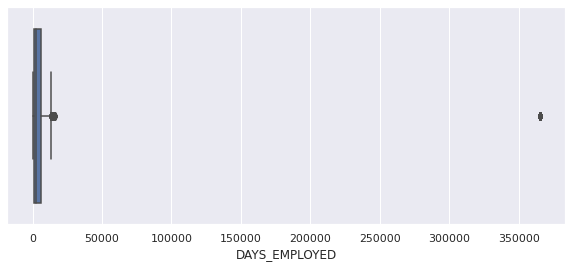

<Figure size 720x288 with 0 Axes>

In [485]:
#Plotting a boxplot for the following to check for outliers
k_list= ['DAYS_REGISTRATION','DAYS_ID_PUBLISH','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED']
for i in k_list:
  sns.boxplot(New_app_data[i])
  plt.figure(figsize=(10,4))
plt.show()

* DAYS_REGISTRATION have outliers clustered together. It looks like its the result of a normal trend.
* DAYS_PUBLISH_ID have no outliers.
* REGION_POPULATION_RELATIVE have an outlier around 0.07. We will accept the outlier as it signify some region that are highly populated.
* DAYS_EMPLOYED have a massive outlier. For this variable, we will look into the column and conduct a sanity check on it.

In [486]:
#Checking the description of the DAYS_EMPLOYED
New_app_data.DAYS_EMPLOYED.describe()

count     33011.000000
mean      68264.649299
std      139872.776901
min           0.000000
25%         942.000000
50%        2231.000000
75%        5874.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

* Changing the value of the DAYS_EMPLOYES which are greater than 300000 days (1000.66 years) to the median value of 2226 days. This outlier could be due to human error as it fails the sanity test.

In [487]:
#Changing the value of the DAYS_EMPLOYES which are greater than 300000 (1000.66 years) to the median value of 2226 days. This outlier could be due to human error as it fails the sanity test
New_app_data['DAYS_EMPLOYED'] = np.where(New_app_data['DAYS_EMPLOYED'] > 300000,2226 , New_app_data['DAYS_EMPLOYED'])

In [488]:
#Checking the description of the DAYS_EMPLOYED column. The max is 17531 days which translate to 48 years which is more probable.
New_app_data['DAYS_EMPLOYED'].describe()

count    33011.000000
mean      2371.526885
std       2135.321320
min          0.000000
25%        942.000000
50%       2226.000000
75%       2779.000000
max      16365.000000
Name: DAYS_EMPLOYED, dtype: float64

In [489]:
# Checking to see if this 365243 figure have been converted to median.
New_app_data[(New_app_data.DAYS_EMPLOYED ==365243)]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

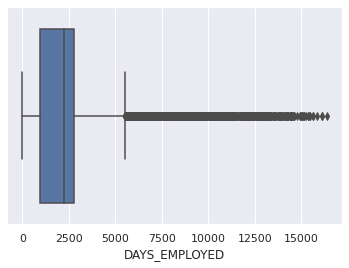

<Figure size 720x288 with 0 Axes>

In [490]:
# Conducting a Boxplot on the DAYS_EMPLOYED 
sns.boxplot(New_app_data.DAYS_EMPLOYED)
plt.figure(figsize=(10,4))
plt.show()

* The outliers in the DAYS_EMPLOYED have been reduced. The leftover outliers are now more club together, which means that this is normal.

In [491]:
# Checking the description of the days employed table
New_app_data.DAYS_EMPLOYED.describe()

count    33011.000000
mean      2371.526885
std       2135.321320
min          0.000000
25%        942.000000
50%       2226.000000
75%       2779.000000
max      16365.000000
Name: DAYS_EMPLOYED, dtype: float64

In [492]:
#Sanity Check 
# Max value is 47.43 years or 17313 days
New_app_data.DAYS_REGISTRATION.describe()

count    33011.000000
mean      4965.102875
std       3520.318643
min          0.000000
25%       1993.000000
50%       4469.000000
75%       7430.000000
max      21244.000000
Name: DAYS_REGISTRATION, dtype: float64

In [493]:
#Sanity Check 
# Max value is 17 years or 6223 days
New_app_data.DAYS_ID_PUBLISH.describe()

count    33011.000000
mean      2987.608615
std       1511.405954
min          0.000000
25%       1717.000000
50%       3250.000000
75%       4293.000000
max       6228.000000
Name: DAYS_ID_PUBLISH, dtype: float64

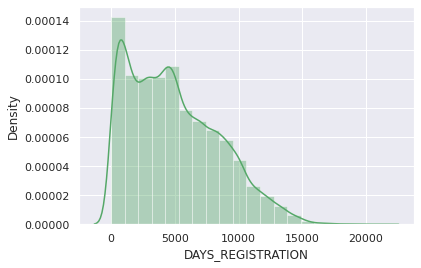

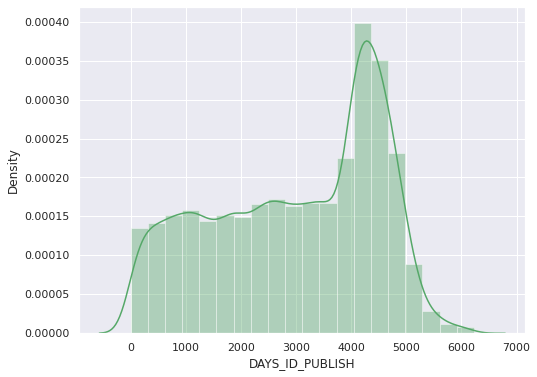

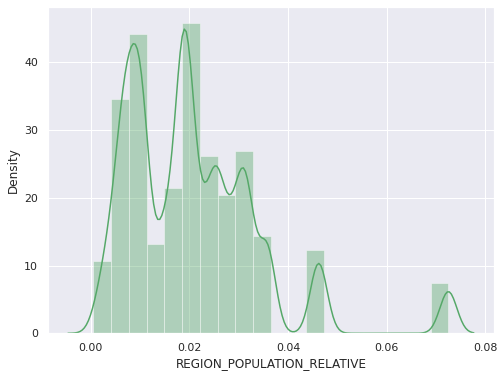

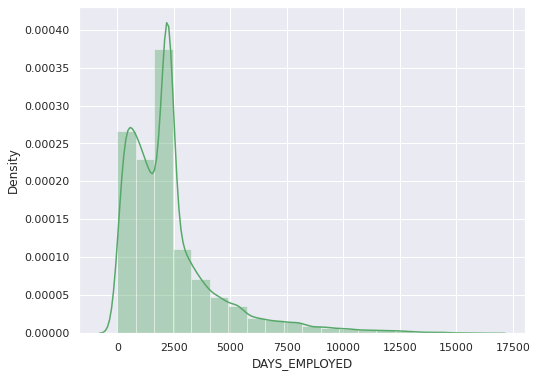

<Figure size 576x432 with 0 Axes>

In [494]:
#Making a distribution plot for the following:
for i in k_list:
  sns.distplot(New_app_data[i],bins= 20, color="g")
  plt.figure(figsize=(8,6))
plt.show()

* The number of days the client change his registration before the application is skewed highly to the left side.
* The number of days the client change the identity document with which he applied for the loan before the application is skewed more on the right side towards 4000 to 5000 days.
* Most of the clients live in the normalized population of region of 0.00 to 0.04. This distribution is positively skewed.
* The customers are employed between 0 to 10000 days (27 years). This distribution is also skewed to the left side.

In [495]:
#Checking the max, mim and median value
New_app_data.DAYS_BIRTH.describe()

count    33011.000000
mean    -16043.260398
std       4359.734752
min     -25182.000000
25%     -19687.500000
50%     -15769.000000
75%     -12379.000000
max      -7680.000000
Name: DAYS_BIRTH, dtype: float64

In [496]:
# Converting Days_Birth values into positive values
New_app_data['BIRTH_Years'] = New_app_data['DAYS_BIRTH'].abs()/365

In [497]:
#Checking the description of the Birth coloumns in years
New_app_data['BIRTH_Years'].describe()

count    33011.000000
mean        43.954138
std         11.944479
min         21.041096
25%         33.915068
50%         43.202740
75%         53.938356
max         68.991781
Name: BIRTH_Years, dtype: float64

In [498]:
# Converting Days Employed in  terms of years
New_app_data['Years_EMPLOYED'] = (New_app_data['DAYS_EMPLOYED']/365)

In [499]:
# Converting DAYS_ID_PUBLISH into terms of years
New_app_data['Years_ID_PUBLISH'] = (New_app_data['DAYS_ID_PUBLISH']/365)

In [500]:
# Checking the description of ID Publish columns in years
New_app_data['Years_ID_PUBLISH'].describe()

count    33011.000000
mean         8.185229
std          4.140838
min          0.000000
25%          4.704110
50%          8.904110
75%         11.761644
max         17.063014
Name: Years_ID_PUBLISH, dtype: float64

In [501]:
#Sanity Check
#Min and Max are in reasonable range
New_app_data.BIRTH_Years.describe()

count    33011.000000
mean        43.954138
std         11.944479
min         21.041096
25%         33.915068
50%         43.202740
75%         53.938356
max         68.991781
Name: BIRTH_Years, dtype: float64

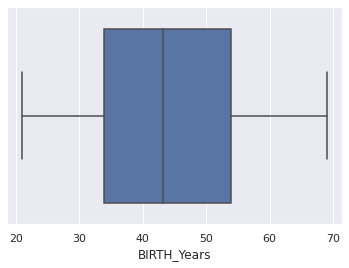

<Figure size 288x288 with 0 Axes>

In [502]:
# Making a boxplot for age to check for outliers
sns.boxplot(New_app_data.BIRTH_Years)
plt.figure(figsize=(4,4))
plt.show()

* No outlier in the age (Birth_years) columns

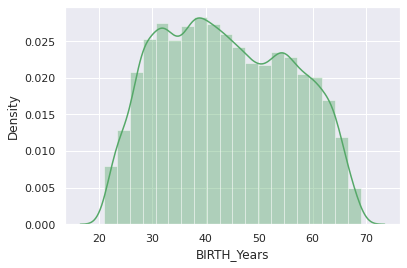

<Figure size 432x432 with 0 Axes>

In [503]:
sns.distplot(New_app_data.BIRTH_Years,bins= 20, color="g")
plt.figure(figsize=(6,6))
plt.show()

* Most customers fall in the age group of 30-60. This is a normal distribution curve.

### Muiltivariate Analysis

In [504]:
#plot the correlation between the given variables:
New_app_data[['BIRTH_Years','Years_EMPLOYED','REGION_POPULATION_RELATIVE','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','Years_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','CNT_CHILDREN']].corr()

BIRTH_Years  Years_EMPLOYED  \
BIRTH_Years                    1.000000        0.247059   
Years_EMPLOYED                 0.247059        1.000000   
REGION_POPULATION_RELATIVE     0.031256        0.003133   
TARGET                        -0.079110       -0.071752   
AMT_INCOME_TOTAL              -0.014801        0.002931   
AMT_CREDIT                     0.061033        0.090525   
AMT_ANNUITY                   -0.009412        0.059285   
AMT_GOODS_PRICE                0.058962        0.092899   
DAYS_REGISTRATION              0.335321        0.140390   
Years_ID_PUBLISH               0.266944        0.065744   
CNT_FAM_MEMBERS               -0.281061       -0.025661   
REGION_RATING_CLIENT          -0.019383        0.002980   
CNT_CHILDREN                  -0.331160       -0.056267   

                            REGION_POPULATION_RELATIVE    TARGET  \
BIRTH_Years                                   0.031256 -0.079110   
Years_EMPLOYED                                0.003133 -0.071752   
REGION_POPULATION_RELATIVE                    1.000000 -0.038603   
TARGET                                       -0.038603  1.000000   
AMT_INCOME_TOTAL                              0.023023  0.014516   
AMT_CREDIT                                    0.094673 -0.031185   
AMT_ANNUITY                                   0.116706 -0.008510   
AMT_GOODS_PRICE                               0.098792 -0.039270   
DAYS_REGISTRATION                             0.065922 -0.045843   
Years_ID_PUBLISH                              0.001451 -0.045365   
CNT_FAM_MEMBERS                              -0.019961  0.011029   
REGION_RATING_CLIENT                         -0.536382  0.067275   
CNT_CHILDREN                                 -0.023397  0.026386   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
BIRTH_Years                        -0.014801    0.061033    -0.009412   
Years_EMPLOYED                      0.002931    0.090525     0.059285   
REGION_POPULATION_RELATIVE          0.023023    0.094673     0.116706   
TARGET                              0.014516   -0.031185    -0.008510   
AMT_INCOME_TOTAL                    1.000000    0.056990     0.068080   
AMT_CREDIT                          0.056990    1.000000     0.772250   
AMT_ANNUITY                         0.068080    0.772250     1.000000   
AMT_GOODS_PRICE                     0.057232    0.986936     0.777367   
DAYS_REGISTRATION                  -0.005879   -0.005058    -0.034983   
Years_ID_PUBLISH                   -0.002207    0.007877    -0.010043   
CNT_FAM_MEMBERS                     0.010931    0.066441     0.078470   
REGION_RATING_CLIENT               -0.031742   -0.101224    -0.127641   
CNT_CHILDREN                        0.009132    0.006908     0.027024   

                            AMT_GOODS_PRICE  DAYS_REGISTRATION  \
BIRTH_Years                        0.058962           0.335321   
Years_EMPLOYED                     0.092899           0.140390   
REGION_POPULATION_RELATIVE         0.098792           0.065922   
TARGET                            -0.039270          -0.045843   
AMT_INCOME_TOTAL                   0.057232          -0.005879   
AMT_CREDIT                         0.986936          -0.005058   
AMT_ANNUITY                        0.777367          -0.034983   
AMT_GOODS_PRICE                    1.000000          -0.008104   
DAYS_REGISTRATION                 -0.008104           1.000000   
Years_ID_PUBLISH                   0.009486           0.103691   
CNT_FAM_MEMBERS                    0.063508          -0.172172   
REGION_RATING_CLIENT              -0.104942          -0.091585   
CNT_CHILDREN                       0.001596          -0.184330   

                            Years_ID_PUBLISH  CNT_FAM_MEMBERS  \
BIRTH_Years                         0.266944        -0.281061   
Years_EMPLOYED                      0.065744        -0.025661   
REGION_POPULATION_RELATIVE          0.001451        -0.019961   
TARGET                             -0.04

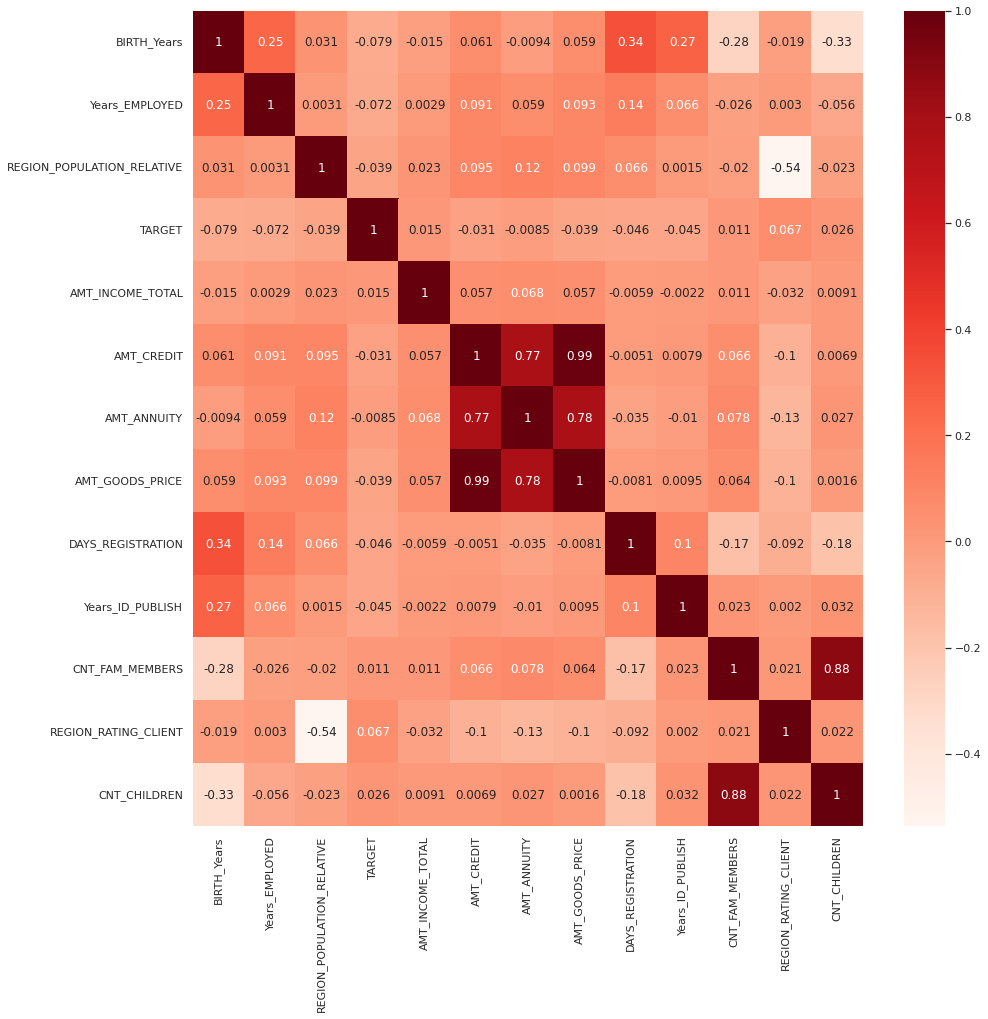

In [579]:
# Conducting a heatmap with the given variables
sns.heatmap(New_app_data[['BIRTH_Years','Years_EMPLOYED','REGION_POPULATION_RELATIVE','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','Years_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','CNT_CHILDREN']].corr(),annot=True, cmap='Reds')
sns.set(rc = {'figure.figsize': (15,15)})
plt.show()

* Correlation among various variables are given above...

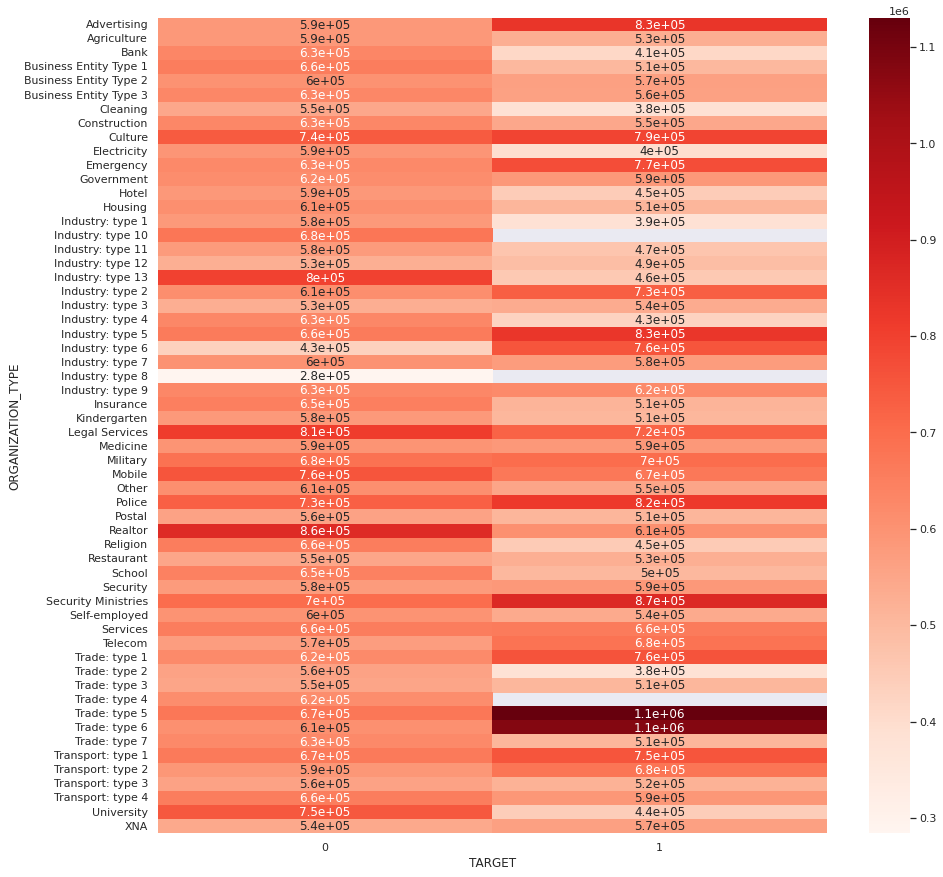

In [506]:
res= pd.pivot_table(data=New_app_data, index='ORGANIZATION_TYPE', columns='TARGET',values= 'AMT_CREDIT')
sns.set(rc = {'figure.figsize': (15,15)})
sns.heatmap(res, cmap = "Reds", annot=True)
plt.show()

* Some organizations who take high amount of credit end up defaulting. Such organization are risky to be offered loans.

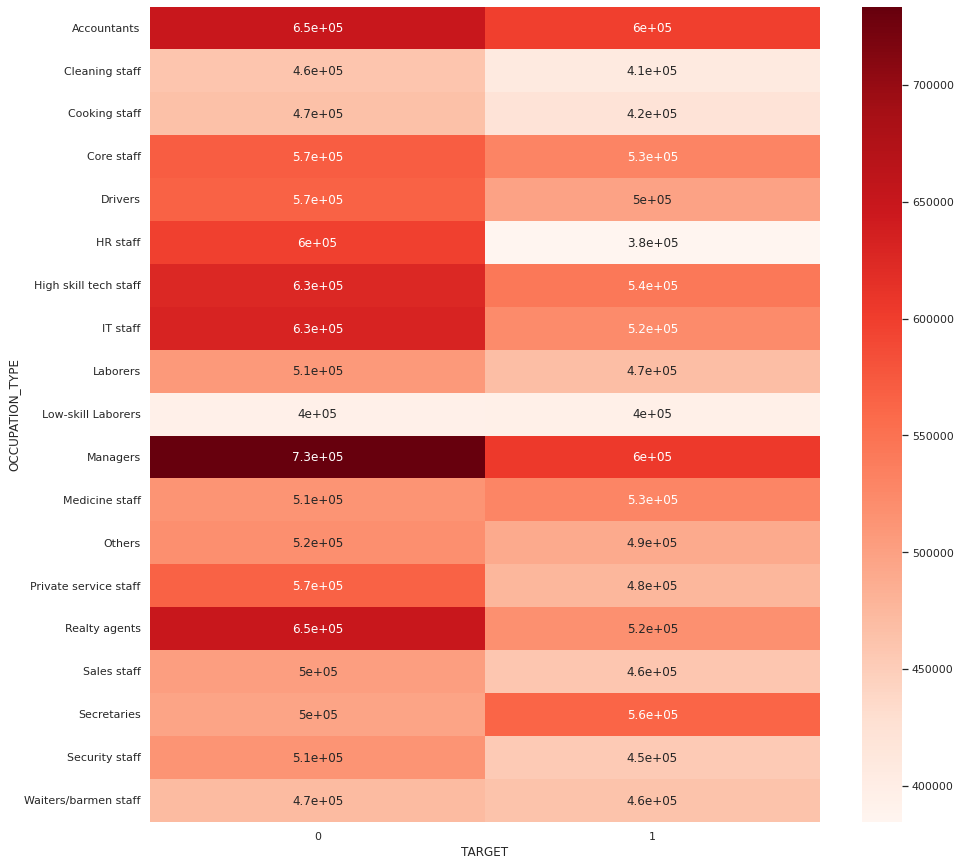

In [507]:
res= pd.pivot_table(data=New_app_data, index='OCCUPATION_TYPE', columns='TARGET',values= 'AMT_GOODS_PRICE')
sns.set(rc = {'figure.figsize': (15,15)})
sns.heatmap(res, cmap = "Reds", annot=True)
plt.show()

* Accountant, Secretaries , Core staff, Managers, Medical staff, High skilled Tech Staff, Realty Agents, Drivers and IT Staff tend to take loans for expensive goods and are likely to default.

### SET 4 Bivariate Analysis

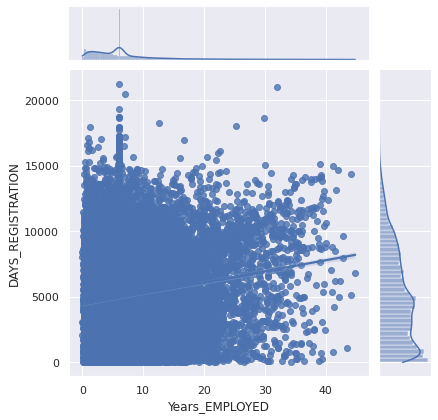

In [508]:
#Plotting a jointplot for the following:
sns.jointplot("Years_EMPLOYED", "DAYS_REGISTRATION", data=New_app_data, kind="reg")
plt.show()

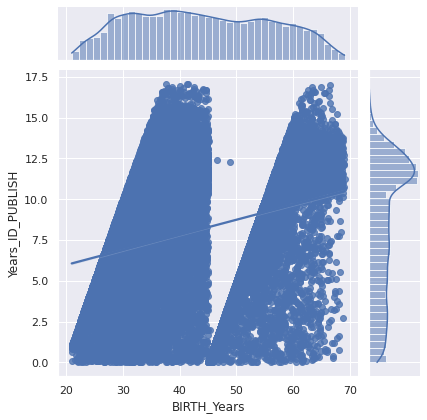

In [509]:
#Plotting a jointplot for the following:
sns.jointplot("BIRTH_Years", "Years_ID_PUBLISH", data=New_app_data, kind="reg")
plt.show()

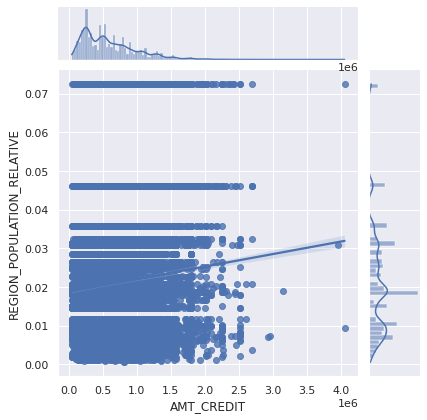

In [510]:
#Plotting a jointplot for the following:
sns.jointplot("AMT_CREDIT", "REGION_POPULATION_RELATIVE", data=New_app_data, kind="reg")
plt.show()

In [511]:
#CREATING BUCKET for BIRTH_Year
New_app_data['age_group']=pd.cut(New_app_data.BIRTH_Years, [0,30,40,50,60,9999], labels=['20-30','30-40','40-50','50-60','60+'])

In [512]:
#Finding out the discription the birth in years
New_app_data['BIRTH_Years'].describe()

count    33011.000000
mean        43.954138
std         11.944479
min         21.041096
25%         33.915068
50%         43.202740
75%         53.938356
max         68.991781
Name: BIRTH_Years, dtype: float64

In [513]:
#Getting the value count of each age group in percentage
New_app_data.age_group.value_counts(normalize=True)

30-40    0.268941
40-50    0.249190
50-60    0.221350
20-30    0.144437
60+      0.116083
Name: age_group, dtype: float64

In [514]:
# Finding out the information regarding the age_group
New_app_data.age_group.describe()

count     33011
unique        5
top       30-40
freq       8878
Name: age_group, dtype: object

In [515]:
# Checking the description of the Years_Employed to group it into bins
New_app_data['Years_EMPLOYED'].describe()

count    33011.000000
mean         6.497334
std          5.850195
min          0.000000
25%          2.580822
50%          6.098630
75%          7.613699
max         44.835616
Name: Years_EMPLOYED, dtype: float64

In [516]:
#Creating buckets for Years_EMPLOYED
New_app_data['Years_emp_gr']=pd.cut(New_app_data.Years_EMPLOYED, [0,5,10,15,20,25,30,35,40,45,50], labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50'])

In [517]:
# Finding out the information regarding the Years_emp_gr
New_app_data.Years_emp_gr.describe()

count     33010
unique        9
top         0-5
freq      14539
Name: Years_emp_gr, dtype: object

In [518]:
# Getting the value count of Employment years group in percentage
New_app_data.Years_emp_gr.value_counts(normalize=True)

0-5      0.440442
5-10     0.391245
10-15    0.089730
15-20    0.036080
20-25    0.021206
25-30    0.011057
30-35    0.006574
35-40    0.003060
40-45    0.000606
45-50    0.000000
Name: Years_emp_gr, dtype: float64

### Splitting the data - Segmented Analysis

In [519]:
#Splitting New_app_data into App_def where TARGET == 1 and App_NonD where TARGET ==0

In [520]:
App_Def= New_app_data[(New_app_data.TARGET ==1)]

In [521]:
App_NonD= New_app_data[(New_app_data.TARGET ==0)]

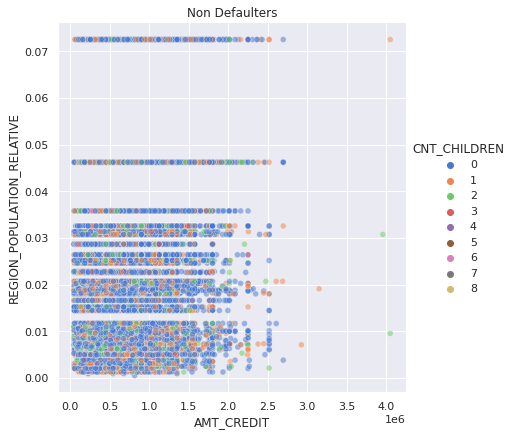

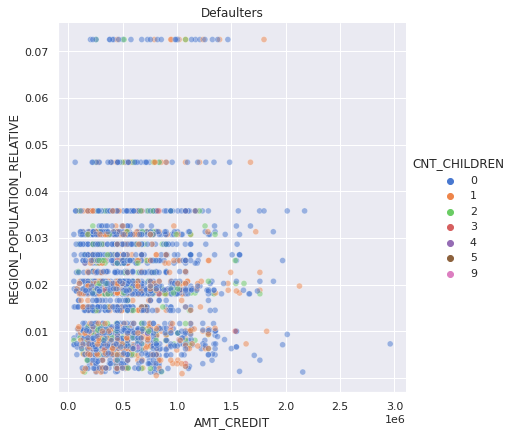

In [522]:
#Plotting a scatterplot
sns.relplot(x="AMT_CREDIT", y="REGION_POPULATION_RELATIVE", hue="CNT_CHILDREN", alpha=.5, palette="muted", height=6, data=App_NonD).set(title='Non Defaulters')
sns.relplot(x="AMT_CREDIT", y="REGION_POPULATION_RELATIVE", hue="CNT_CHILDREN", alpha=.5, palette="muted", height=6, data=App_Def).set(title='Defaulters')
plt.show()

* First scatter plot is one with no defaulters. Most of them have mainly no children and tend to live in region with a population of 0.0 to 0.05 and most take credit upto 2.5.
* Second scatter plot is on with defaulters. Most take credit upto 1.5 and tend to live in region with a population of 0.00 to 0.05. Many of them have no children but here more of them have one or more children.

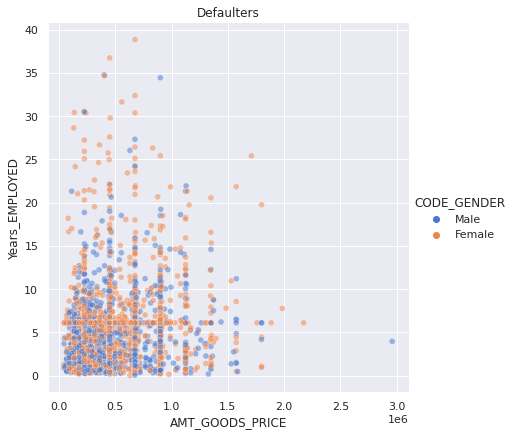

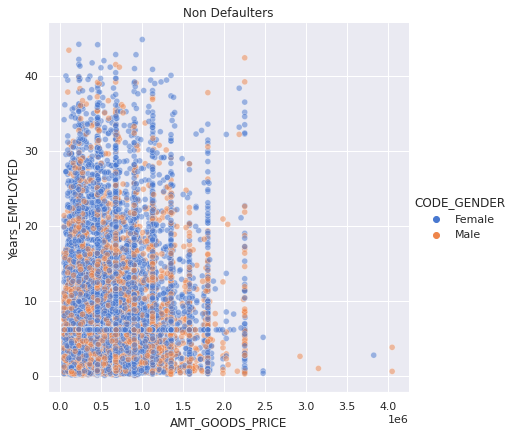

In [523]:
#Plotting a scatter plot
sns.relplot(x="AMT_GOODS_PRICE", y="Years_EMPLOYED", hue="CODE_GENDER", alpha=.5, palette="muted", height=6, data=App_Def).set(title='Defaulters')
sns.relplot(x="AMT_GOODS_PRICE", y="Years_EMPLOYED", hue="CODE_GENDER", alpha=.5, palette="muted", height=6, data=App_NonD).set(title='Non Defaulters')
plt.show()


* In the first scatterplot with defaulters, most of the females are defaulters as compared to men especially when females have been employed for less than 10 years. They usually opt for to take loan for the price of good less than 1.5. Males defaulters also take loan for good less than 1.5 and most also have less than 10 years of employment.
* In the second scatterplot with non defaulters, there are more non defaulters females as compared to men. Non Defaulters usually opt for to take loan for the price of good less than 2.0.They come from various years of employment, from 0 till a little more than 40 years.

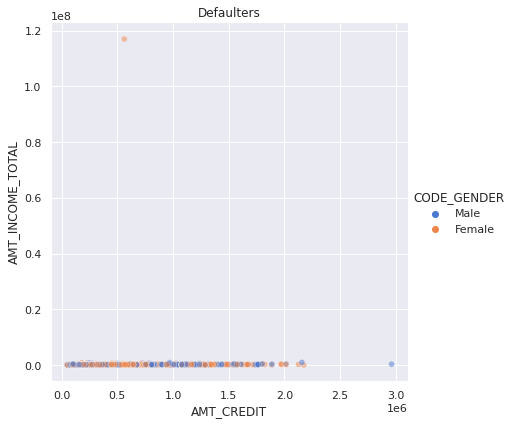

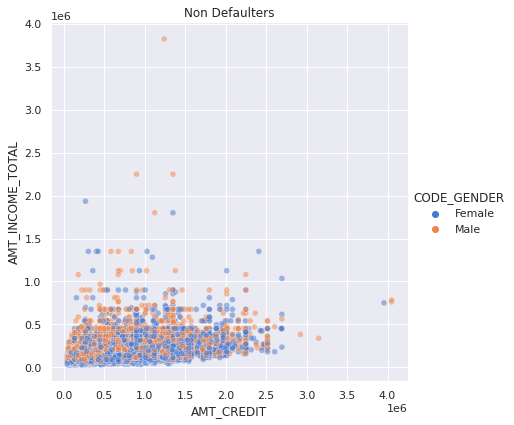

In [524]:
# Plotting the scatter plot with defaulters and the second one with non defaulters
sns.relplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", alpha=.5, palette="muted", height=6, data=App_Def).set(title='Defaulters')
sns.relplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", alpha=.5, palette="muted", height=6, data=App_NonD).set(title='Non Defaulters')
plt.show()

* In the first scatterplot, the income rate of the client is 0.0 but take credit of upto 2.0. Both male and female tend to default equally in this case.
* In the second case, most have an income rate of more than 0.0 and they take credit of upto 2.5. Most of them taking loans are females. Males tend to have higher income than females.

## Previous Data Analysis

In [525]:
# Viewing the data
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -73.0  Cash through the bank                XAP              NaN   
1         -164.0                    XNA                XAP    Unaccompanied   
2         -301.0  Cash through the bank                XAP  Spouse, partner   
3         -512.0  Cash through the bank                XAP              NaN   
4         -781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center              -1.0                  XNA   
2  Credit and cash offices              -1.0                  XNA   
3  Credit and cash offices              -1.0                  XNA   
4  Credit and cash offices              -1.0                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [526]:
#Checking the rows and columns of the pre_app data
pre_app.shape

(8465, 37)

In [527]:
#Getting the description of the data
pre_app.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  8.465000e+03    8465.000000    6758.000000     8.465000e+03   
mean   1.922164e+06  280375.319905   14929.829900     1.628921e+05   
std    5.367953e+05  102853.570315   13894.798081     2.705861e+05   
min    1.000140e+06  100035.000000       0.000000     0.000000e+00   
25%    1.457145e+06  192458.000000    6079.533750     2.407910e+04   
50%    1.914944e+06  279571.000000   10526.422500     7.150500e+04   
75%    2.389371e+06  371084.000000   18979.526250     1.644300e+05   
max    2.845356e+06  456254.000000  204635.790000     2.700000e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  8.465000e+03       4395.000000     6.750000e+03   
mean   1.823300e+05       6535.029317     2.042787e+05   
std    2.976771e+05      16635.119286     2.887325e+05   
min    0.000000e+00          0.000000     0.000000e+00   
25%    2.766600e+04          0.000000     4.892175e+04   
50%    7.810200e+04       1570.500000     9.895500e+04   
75%    1.819845e+05       7947.000000     2.225340e+05   
max    3.020760e+06     489600.000000     2.700000e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count              8465.000000             8465.000000        4395.000000   
mean                 12.554991                0.996929           0.079535   
std                   3.316031                0.055339           0.107990   
min                   1.000000                0.000000           0.000000   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.048451   
75%                  15.000000                1.000000           0.108913   
max                  22.000000                1.000000           0.818315   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count              36.000000                 36.000000    8464.000000   
mean                0.209529                  0.792371    -909.297023   
std                 0.120888                  0.093239     791.197295   
min                 0.142440                  0.568710   -2920.000000   
25%                 0.160716                  0.715645   -1373.250000   
50%                 0.189136                  0.835095    -605.000000   
75%                 0.193333                  0.856237    -296.000000   
max                 0.696163                  0.867336      -2.000000   

       SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      8.464000e+03  6757.000000         5297.000000     5297.000000   
mean       8.477363e+02    15.209708       344714.242024    14662.528412   
std        4.350041e+04    13.596289        84238.710300    74363.374736   
min       -1.000000e+00     0.000000        -2888.000000    -2889.000000   
25%       -1.000000e+00     6.000000       365243.000000    -1626.000000   
50%        2.000000e+01    12.000000       365243.000000     -811.000000   
75%        1.290000e+02    18.000000       365243.000000     -395.000000   
max        4.000000e+06    60.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count                5297.000000    5297.000000       5297.000000   
mean                30940.946951   75397.747215      80042.074571   
std                102861.085660  148827.174697     152036.551492   
min                 -2783.000000   -2829.000000      -2726.000000   
25%                 -1289.000000   -1338.000000      -1302.000000   
50%                  -376.000000    -537.000000       -501.000000   
75%                    99.000000     -76.000000        -52.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count                5297.000000  
mean                    0.303757  
std                     0.459922  
min                     0.000000  
25%                  

In [528]:
# Finding information on the data
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   8465 non-null   int64  
 1   SK_ID_CURR                   8465 non-null   int64  
 2   NAME_CONTRACT_TYPE           8465 non-null   object 
 3   AMT_ANNUITY                  6758 non-null   float64
 4   AMT_APPLICATION              8465 non-null   float64
 5   AMT_CREDIT                   8465 non-null   float64
 6   AMT_DOWN_PAYMENT             4395 non-null   float64
 7   AMT_GOODS_PRICE              6750 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   8465 non-null   object 
 9   HOUR_APPR_PROCESS_START      8465 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  8465 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       8465 non-null   int64  
 12  RATE_DOWN_PAYMENT            4395 non-null   float64
 13  RATE_INTEREST_PRIM

### Removing the columns of pre_data if it has null values of more than 40%.

In [529]:
# Finding the the null values of each colomn, divinding it by the length of the columns, multiplying it by 100 to get the null values in percentage, rounding the percentage to two decimal place and sorting the values in descending order
round(pre_app.isnull().sum()/len(pre_app)* 100, 2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.57
RATE_INTEREST_PRIMARY          99.57
NAME_TYPE_SUITE                48.46
RATE_DOWN_PAYMENT              48.08
AMT_DOWN_PAYMENT               48.08
NFLAG_INSURED_ON_APPROVAL      37.42
DAYS_FIRST_DRAWING             37.42
DAYS_FIRST_DUE                 37.42
DAYS_LAST_DUE_1ST_VERSION      37.42
DAYS_LAST_DUE                  37.42
DAYS_TERMINATION               37.42
AMT_GOODS_PRICE                20.26
CNT_PAYMENT                    20.18
AMT_ANNUITY                    20.17
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.01
NAME_PRODUCT_TYPE               0.01
NAME_YIELD_GROUP                0.01
SELLERPLACE_AREA                0.01
NAME_SELLER_INDUSTRY            0.01
NAME_GOODS_CATEGORY             0.01
NAME_PORTFOLIO                  0.01
NAME_PAYMENT_TYPE               0.01
NAME_CLIENT_TYPE                0.01
CODE_REJECT_REASON              0.01
DAYS_DECISION                   0.01
SK_ID_CURR                      0.00
N

In [530]:
# Storing the series in Res
res = round(pre_app.isnull().sum()/len(pre_app)* 100, 2).sort_values(ascending = False)

In [531]:
#Converting the series into a dictionary and filtering the dictionary to keep only those with values of more than 40
Res= dict(res)

Dlist = {}
for key,value in Res.items():
  if value > 40:
    Dlist[key] = value

In [532]:
# Storing keys of the Dlist in a list as the names of columns with more than 40% null values
To_Drop=list(Dlist.keys())

In [533]:
# Dropping the colomns with more than 40% missing values
New_pre_data = pre_app.drop(To_Drop, axis=1)

In [534]:
#Checking the data
round(New_pre_data.isnull().sum()/len(New_pre_data)* 100, 2).sort_values(ascending = False)

NFLAG_INSURED_ON_APPROVAL      37.42
DAYS_LAST_DUE                  37.42
DAYS_FIRST_DUE                 37.42
DAYS_LAST_DUE_1ST_VERSION      37.42
DAYS_FIRST_DRAWING             37.42
DAYS_TERMINATION               37.42
AMT_GOODS_PRICE                20.26
CNT_PAYMENT                    20.18
AMT_ANNUITY                    20.17
PRODUCT_COMBINATION             0.02
NAME_GOODS_CATEGORY             0.01
NAME_YIELD_GROUP                0.01
NAME_SELLER_INDUSTRY            0.01
SELLERPLACE_AREA                0.01
CHANNEL_TYPE                    0.01
NAME_PRODUCT_TYPE               0.01
NAME_PORTFOLIO                  0.01
NAME_CLIENT_TYPE                0.01
CODE_REJECT_REASON              0.01
NAME_PAYMENT_TYPE               0.01
DAYS_DECISION                   0.01
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
W

In [535]:
#Finding the info of the New_pre_data
New_pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   8465 non-null   int64  
 1   SK_ID_CURR                   8465 non-null   int64  
 2   NAME_CONTRACT_TYPE           8465 non-null   object 
 3   AMT_ANNUITY                  6758 non-null   float64
 4   AMT_APPLICATION              8465 non-null   float64
 5   AMT_CREDIT                   8465 non-null   float64
 6   AMT_GOODS_PRICE              6750 non-null   float64
 7   WEEKDAY_APPR_PROCESS_START   8465 non-null   object 
 8   HOUR_APPR_PROCESS_START      8465 non-null   int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  8465 non-null   object 
 10  NFLAG_LAST_APPL_IN_DAY       8465 non-null   int64  
 11  NAME_CASH_LOAN_PURPOSE       8465 non-null   object 
 12  NAME_CONTRACT_STATUS         8465 non-null   object 
 13  DAYS_DECISION     

In [536]:
#Finding out how many columns and rows in the New_pre_data.
New_pre_data.shape

(8465, 32)

### SET A Categorical variables

In [537]:
#SET Categorical variables
New_pre_data.NAME_CONTRACT_TYPE.value_counts()

Consumer loans     4206
Cash loans         3325
Revolving loans     933
XNA                   1
Name: NAME_CONTRACT_TYPE, dtype: int64

* One of the values in the New contract type column was *cas*. It seems to be
due to human error where cas was written in place of cash loan. Hence cas has been imputed as cash loan.

In [538]:
#Changing the value of the NAME_Contract_TYPE which is Cas to the value of Cash loan. This outlier could be due to human error of writing cash loans as Cas
New_pre_data['NAME_CONTRACT_TYPE'] = np.where(New_pre_data['NAME_CONTRACT_TYPE']== 'Cas','Cash loans' , New_pre_data['NAME_CONTRACT_TYPE'])

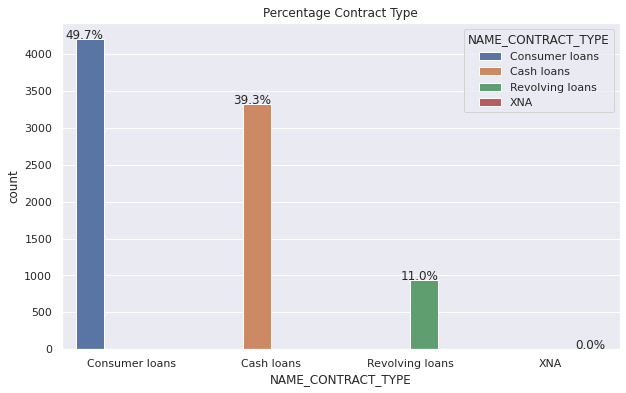

In [539]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_pre_data.NAME_CONTRACT_TYPE))
Con_type = sns.countplot(x ='NAME_CONTRACT_TYPE', hue="NAME_CONTRACT_TYPE", data= New_pre_data,)
plt.title('Percentage Contract Type')

for p in Con_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Con_type.annotate(percentage, (x, y), ha='right')
plt.show()

* In the contract type loan, the highest is Consumer loans(53%),followed by cash loans(35%), last followed by revolving loan(11.3%).

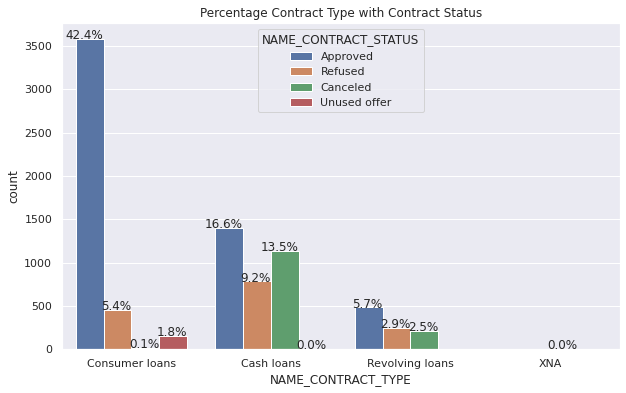

In [540]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_pre_data.NAME_CONTRACT_TYPE))
Con_type = sns.countplot(x ='NAME_CONTRACT_TYPE', hue="NAME_CONTRACT_STATUS", data= New_pre_data,)
plt.title('Percentage Contract Type with Contract Status')

for p in Con_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Con_type.annotate(percentage, (x, y), ha='right')
plt.show()

* Most of the consumer loans were approved(42.4%), while only 5.4% was refused. In the case of cash loan, only 16.6% was approved and 9.2% was refused. In case of revolving loan, percentage of aproval and refused are very low(under 6%). 

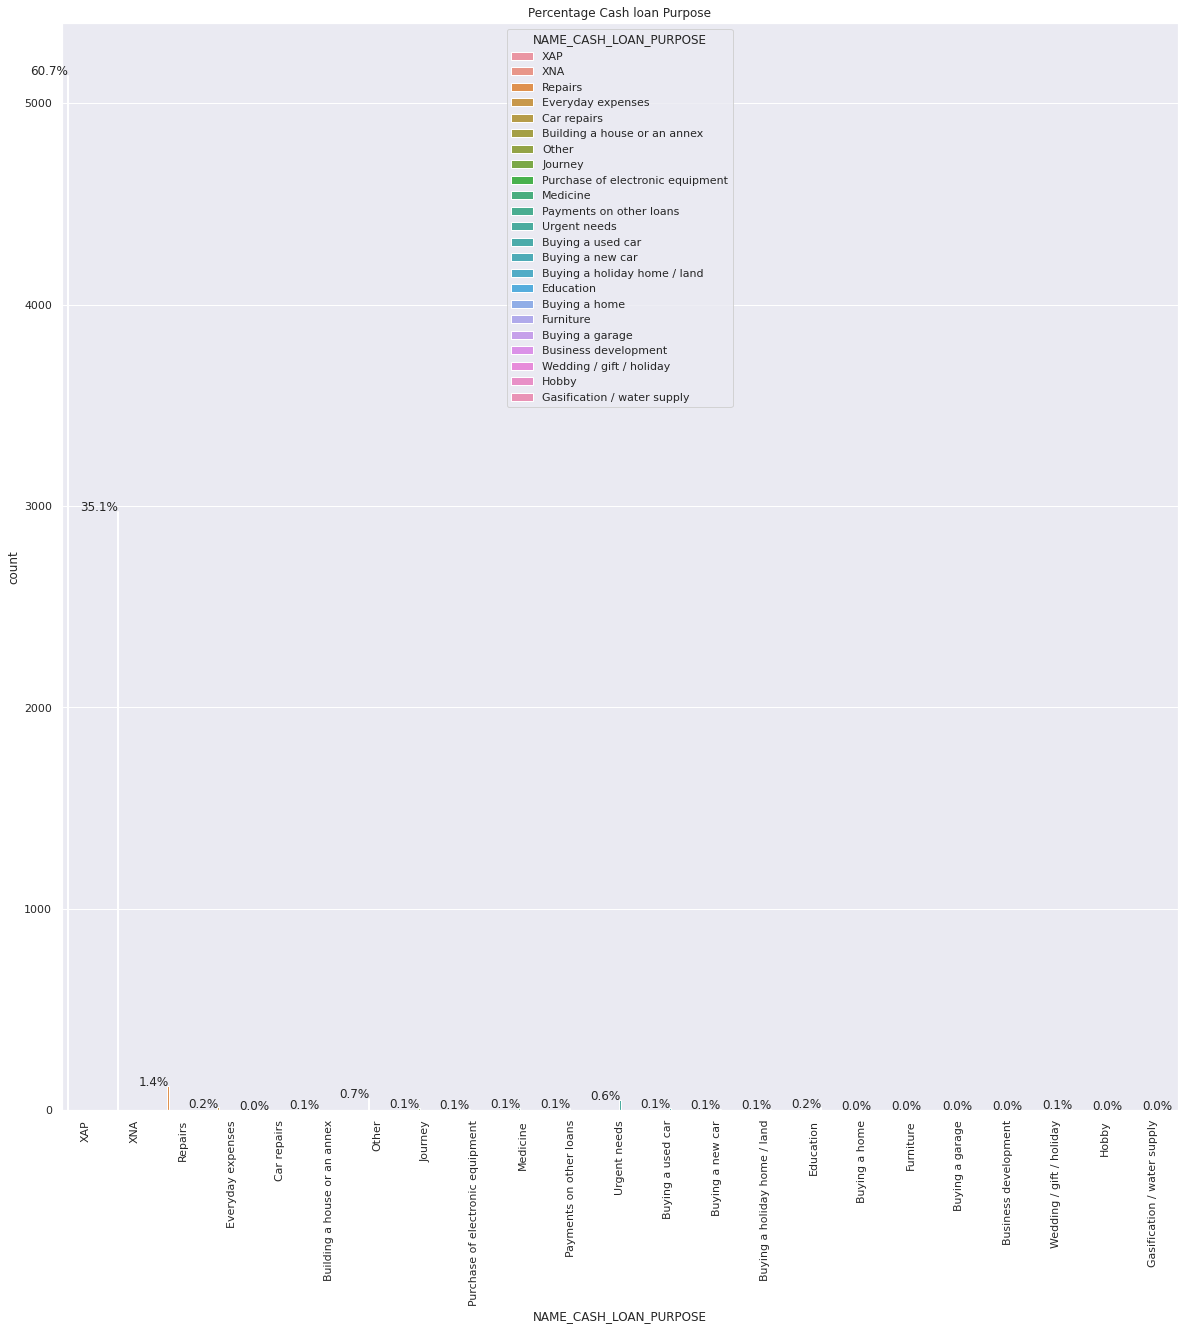

In [541]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,20))
total = float(len(New_pre_data.NAME_CASH_LOAN_PURPOSE))
Cash_type = sns.countplot(x ='NAME_CASH_LOAN_PURPOSE', hue="NAME_CASH_LOAN_PURPOSE", data= New_pre_data,)
plt.title('Percentage Cash loan Purpose')
plt.xticks(rotation = 90)
for p in Cash_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Cash_type.annotate(percentage, (x, y), ha='right')
plt.show()

* Most of the loan either falls under XAP (60.7%) or XNA(35.1%). It is assumed that XAP stands for not applicable to any of the given category and are miscellaneous and XNA stands for missing value or unknown reason.

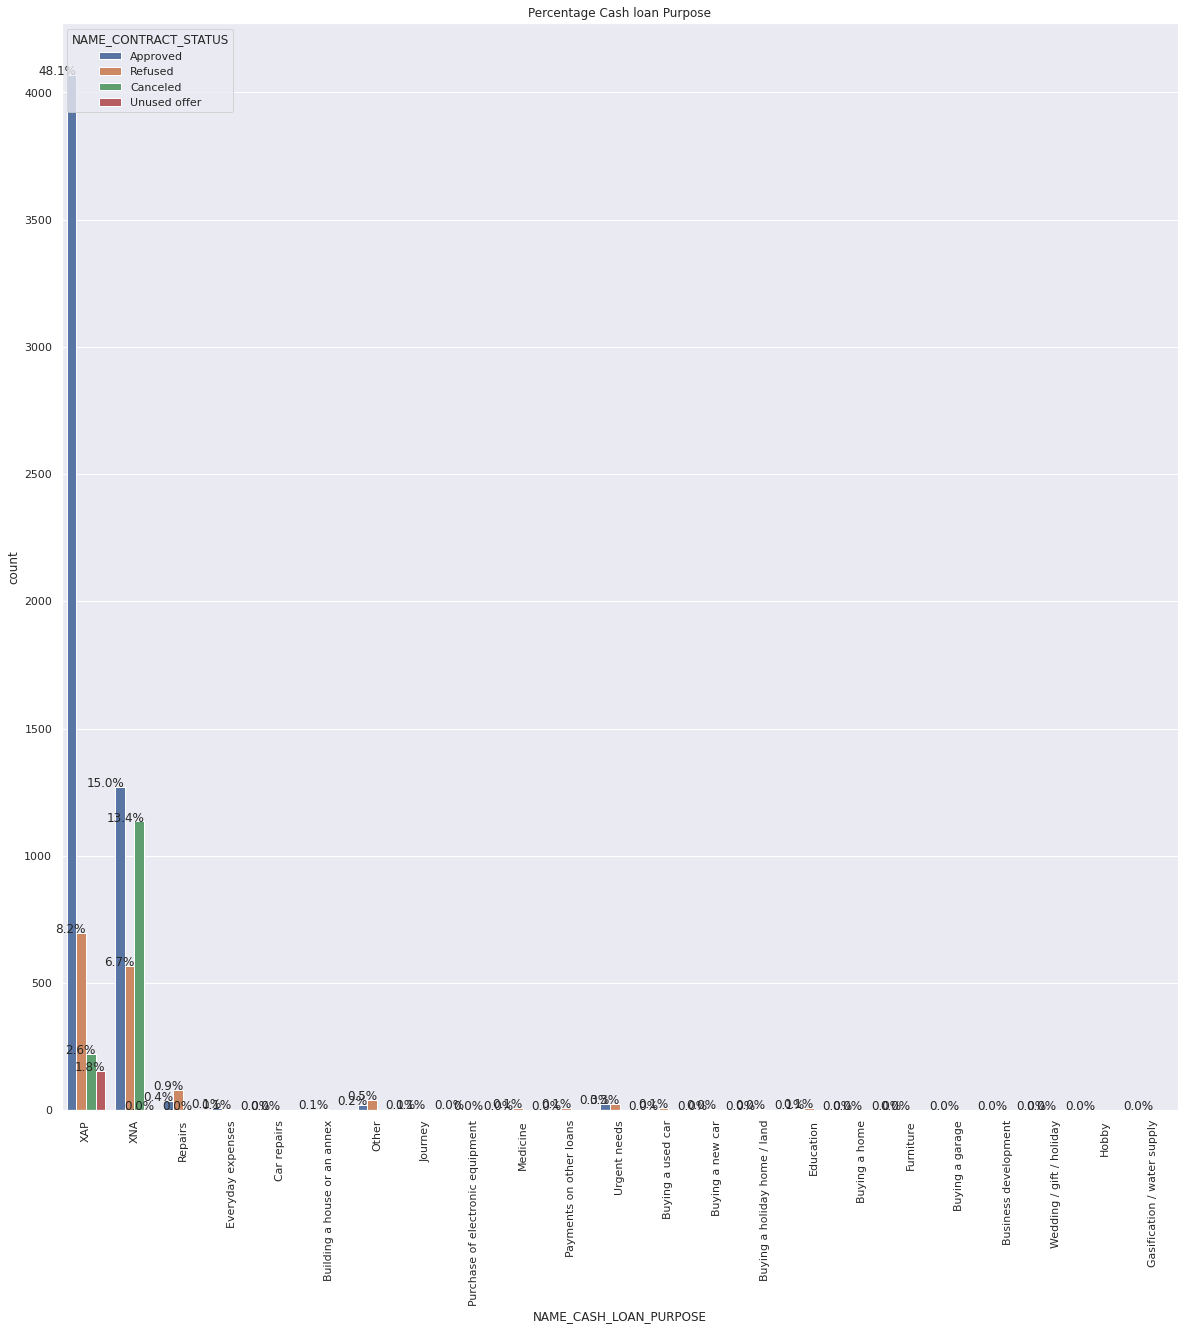

In [542]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,20))
total = float(len(New_pre_data.NAME_CASH_LOAN_PURPOSE))
Cash_type = sns.countplot(x ='NAME_CASH_LOAN_PURPOSE', hue="NAME_CONTRACT_STATUS", data= New_pre_data,)
plt.title('Percentage Cash loan Purpose')
plt.xticks(rotation = 90)
for p in Cash_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    Cash_type.annotate(percentage, (x, y), ha='right')
plt.show()

* 48% of the XAP loans were approved while only 8.2% were rejected. In the case of XNA, 15% were approved, 6.7% was rejected and 13.4% were rejected.

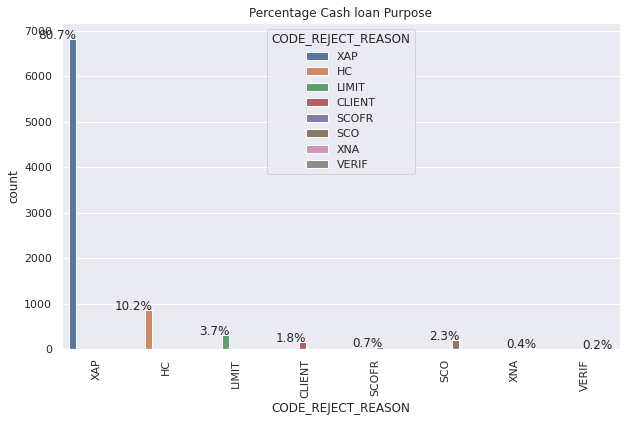

In [543]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_pre_data.CODE_REJECT_REASON))
rej_type = sns.countplot(x ='CODE_REJECT_REASON', hue="CODE_REJECT_REASON", data= New_pre_data,)
plt.title('Percentage Cash loan Purpose')
plt.xticks(rotation = 90)
for p in rej_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    rej_type.annotate(percentage, (x, y), ha='right')
plt.show()

* About 80.7% of the loans get rejected under XAP. It is assumed that XAP stands for miscellaneous reasons.

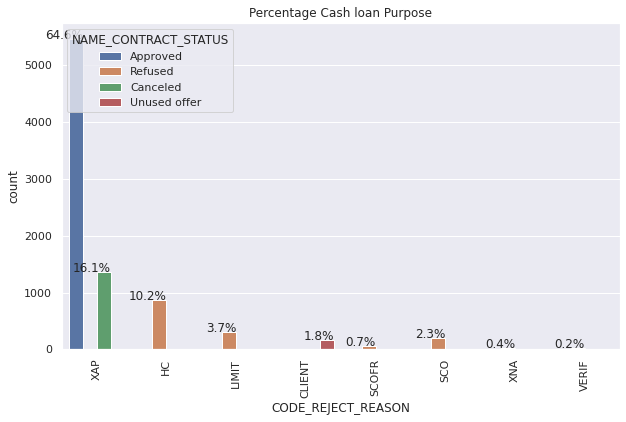

In [544]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_pre_data.CODE_REJECT_REASON))
rej_type = sns.countplot(x ='CODE_REJECT_REASON', hue="NAME_CONTRACT_STATUS", data= New_pre_data,)
plt.title('Percentage Cash loan Purpose')
plt.xticks(rotation = 90)
for p in rej_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    rej_type.annotate(percentage, (x, y), ha='right')
plt.show()

*  Most loans are Refused due to HC (10.2%) and limit(3.7%).On the other hand 64.6% of the loans rejected under XAP were actually approved and only 16% of the XAP were cancelled.

### SET B Numerical Variables

In [545]:
#SET 2 Numerical Variable

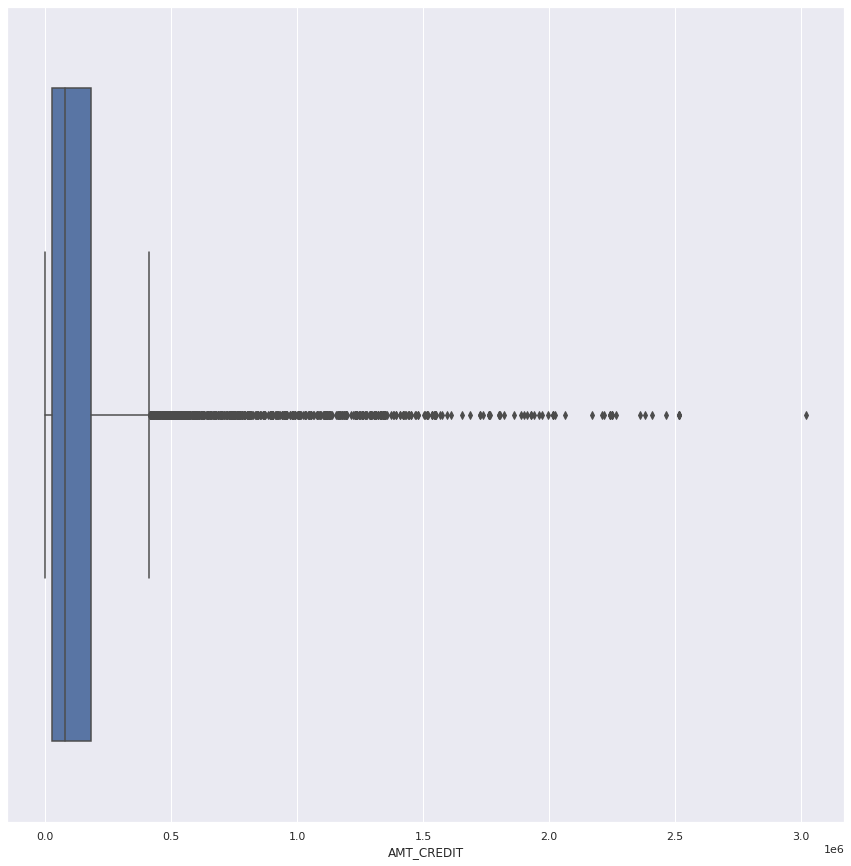

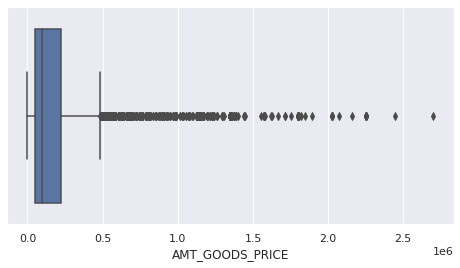

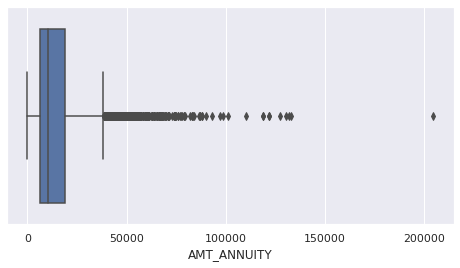

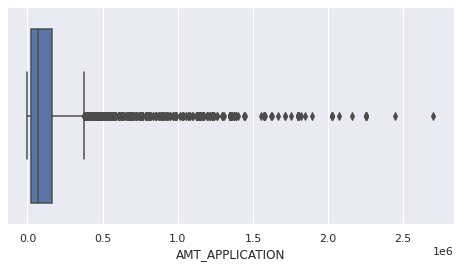

<Figure size 576x288 with 0 Axes>

In [546]:
# Conducting a box plot For AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION to check for Outliers
j_list= ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION']
for i in j_list:
  sns.boxplot(New_pre_data[i])
  plt.figure(figsize=(8,4))
plt.show()

* AMT_Credit outliers are close together. Since customers take  various amount of credit amount of the loan, these outliers are acceptable.
* AMT_GOODS_PRICE also have outliers. These are acceptable as the customers wish purchase goods that vary in prices and hence resort to taking out loans to buy them.
* AMT_ANNUITY is the loan annuity. Most outliers are custered together except for a few above 200000
* AMT_APPLICATION is the amount of loans the client requested in their previous application. The outliers are rather close together and are acceptable.

In [547]:
# Checking out the New_pre_data columns
New_pre_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

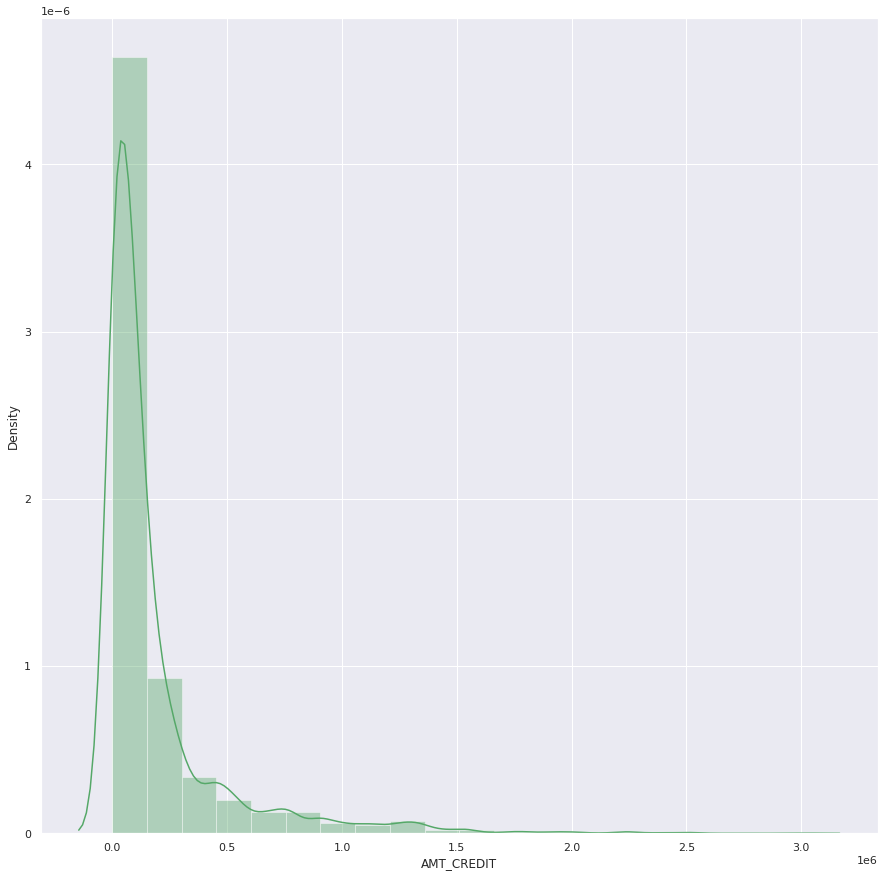

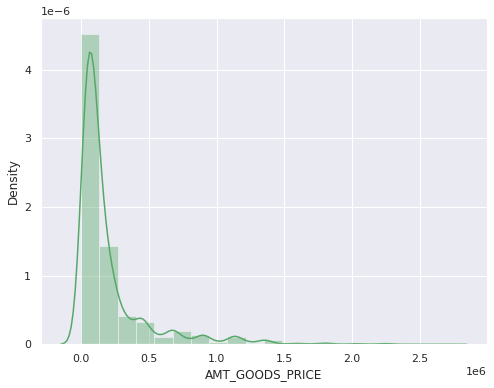

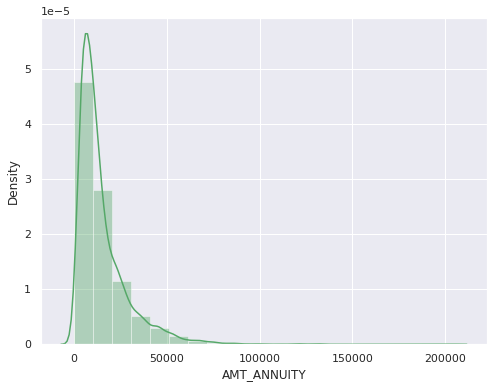

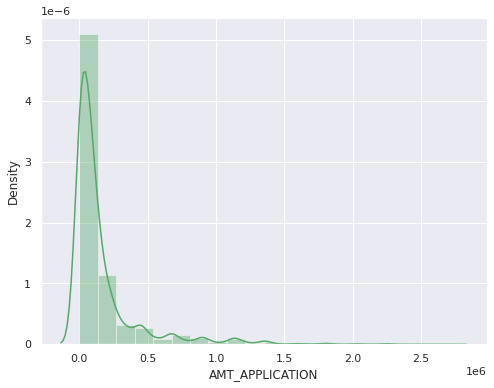

<Figure size 576x432 with 0 Axes>

In [548]:
# Conducting a distribution plot for AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION variables
for i in j_list:
  sns.distplot(New_pre_data[i],bins= 20, color="g")
  plt.figure(figsize=(8,6))
plt.show()

* The distribution of AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION shows that they are skewed to the left side. This tells us that the mean is less than the median. This shewness is positive.

In [549]:
#Ploting the correlation between AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION,  NAME_CONTRACT_STATUS variables
New_pre_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION', 'NAME_CONTRACT_STATUS']].corr()

AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  AMT_APPLICATION
AMT_CREDIT         1.000000         0.993440     0.821522         0.972281
AMT_GOODS_PRICE    0.993440         1.000000     0.829172         1.000000
AMT_ANNUITY        0.821522         0.829172     1.000000         0.813190
AMT_APPLICATION    0.972281         1.000000     0.813190         1.000000

* There is a very high correlation between AMT_GOODS_PRICE and AMT_CREDIT, AMT_CREDIT and AMT_ANNUITY, AMT_CREDIT and AMT_APPLICATION, AMT_GOODS_PRICE and AMT_ANNUITY, AMT_GOODS_PRICE and AMT_APPLICATION and AMT_ANNUITY and AMT_APPLICATION (amost 1)
* All these variables are strongly interrelated and depend on each other.







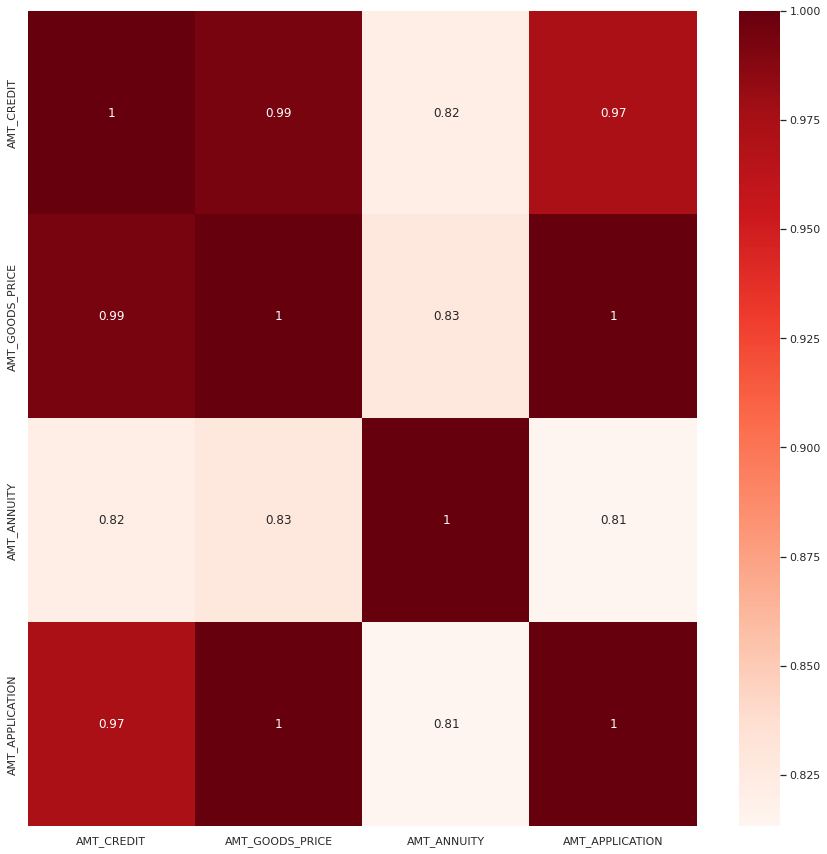

In [550]:
# Conducting a heatmap on these AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION variables
sns.heatmap(New_pre_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION']].corr(),annot=True, cmap='Reds')
sns.set(rc = {'figure.figsize': (6,6)})
plt.show()

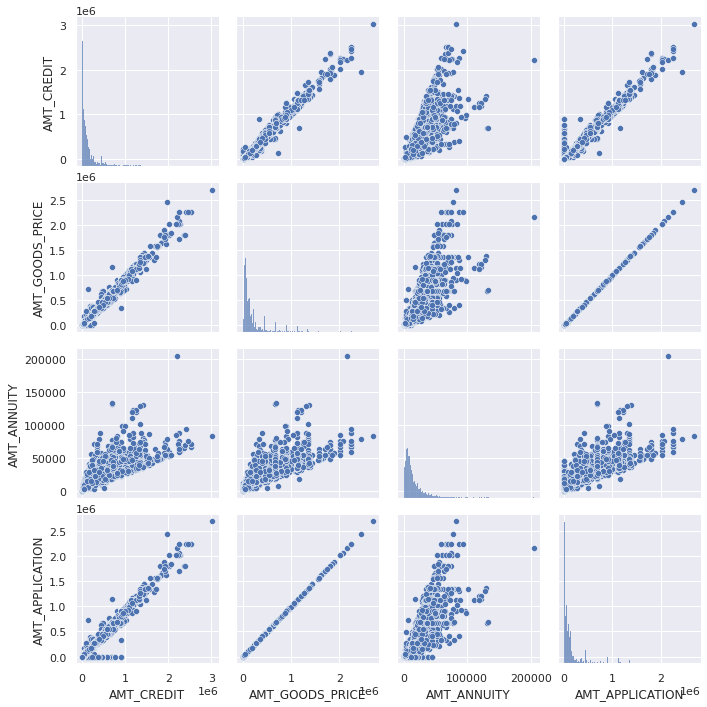

In [551]:
# Ploting a pairplot to display strong relationship between these AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION variables.
sns.pairplot(New_pre_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_APPLICATION',]])
plt.show()

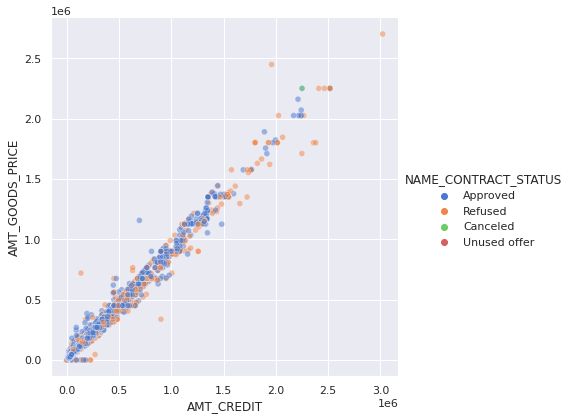

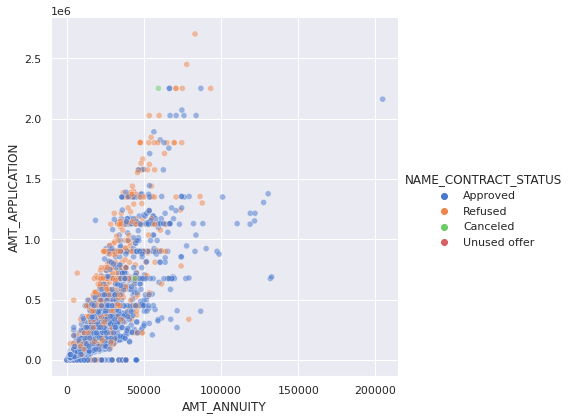

In [552]:
# Ploting scatter plot between AMT_CREDIT','AMT_GOODS_PRICE' with CONTRACT_STATUS and another one between'AMT_ANNUITY','AMT_APPLICATION, with CONTRACT_STATUS
sns.relplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", hue="NAME_CONTRACT_STATUS", alpha=.5, palette="muted", height=6, data=New_pre_data)
sns.relplot(x="AMT_ANNUITY", y="AMT_APPLICATION", hue="NAME_CONTRACT_STATUS", alpha=.5, palette="muted", height=6, data=New_pre_data)
plt.show()

* In the First scatterplot, most with lower credit amount of the loan and price of good for which the loan was taken out were approved. But for those beyond 1.5 tended to be rejected.
* In the Second scatterplot, those falling more towards loans annuity were accepted but those who asked for higher amounts in the loan application and took less loans annuity were refused loans.



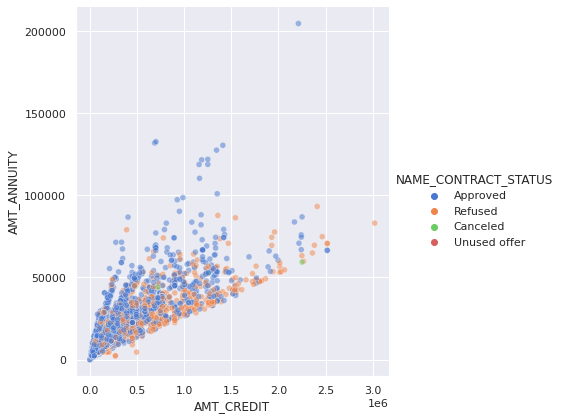

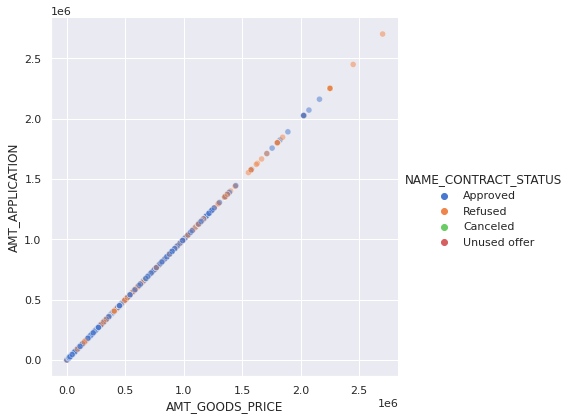

In [553]:
# Plotting a scatter plot between "AMT_CREDIT", "AMT_ANNUITY", with Contract status and another one between "AMT_GOODS_PRICE", "AMT_APPLICATION" with Contract status
sns.relplot(x="AMT_CREDIT", y="AMT_ANNUITY", hue="NAME_CONTRACT_STATUS", alpha=.5, palette="muted", height=6, data=New_pre_data)
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_APPLICATION", hue="NAME_CONTRACT_STATUS", alpha=.5, palette="muted", height=6, data=New_pre_data)
plt.show()

* In the first scatter plot more loans were approved if they opted for higher loan annuity and lower credit amount of the loan. They were more likely to be rejected if they opted for higher credit amount and lower amount of loan annuity
* Application for the credit and the price of the good are perfectly linearly correlated. If it is up to 1.5, there is high likelyhood of being approved but beyond that, they are more likely to be refused a loan.

## Merging the two dataframes (New_app_data and New_pre_data) to form Full_DF dataframe

In [554]:
#Merging the two dataframes using an inner join on SK_ID_CURR to form Full_df dataframe
Full_df = pd.merge(New_app_data, New_pre_data, how='inner', on = 'SK_ID_CURR')

### Getting information and description on Full_DF 

In [555]:
#Finding out the number of rows and columns in the Full_df
Full_df.shape

(696, 109)

In [556]:
#Getting the description of each columns in Full_df
Full_df.describe()

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count     696.000000  696.000000    696.000000        696.000000   
mean   119124.264368    0.077586      0.441092     170462.870690   
std     11323.475045    0.267712      0.789850      88772.605783   
min    100035.000000    0.000000      0.000000      40500.000000   
25%    108898.000000    0.000000      0.000000     112500.000000   
50%    119586.000000    0.000000      0.000000     153000.000000   
75%    128835.750000    0.000000      1.000000     202500.000000   
max    138227.000000    1.000000      5.000000     675000.000000   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  6.960000e+02     696.000000       6.960000e+02   
mean   5.636692e+05   26160.905172       5.051676e+05   
std    3.820654e+05   13849.478873       3.518477e+05   
min    4.500000e+04    2052.000000       4.500000e+04   
25%    2.700000e+05   16138.125000       2.295000e+05   
50%    4.731300e+05   23973.750000       4.500000e+05   
75%    7.655782e+05   33279.750000       6.750000e+05   
max    2.250000e+06  130018.500000       2.250000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                  696.000000    696.000000     696.000000   
mean                     0.021149 -16222.034483    2312.679598   
std                      0.013960   4471.696635    1866.357126   
min                      0.001276 -25053.000000      59.000000   
25%                      0.010147 -20067.750000    1091.500000   
50%                      0.019101 -15758.500000    2226.000000   
75%                      0.026960 -12364.750000    2670.500000   
max                      0.072508  -7921.000000   13809.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count         696.000000       696.000000       696.0      696.000000   
mean         4934.604885      3060.959770         1.0        0.790230   
std          3587.508985      1468.018378         0.0        0.407437   
min             2.000000         1.000000         1.0        0.000000   
25%          1766.250000      1847.500000         1.0        1.000000   
50%          4383.000000      3406.000000         1.0        1.000000   
75%          7567.500000      4307.750000         1.0        1.000000   
max         16520.000000      6068.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
count       696.000000             696.0  696.000000  696.000000   
mean          0.195402               1.0    0.275862    0.058908   
std           0.396795               0.0    0.447269    0.235622   
min           0.000000               1.0    0.000000    0.000000   
25%           0.000000               1.0    0.000000    0.000000   
50%           0.000000               1.0    0.000000    0.000000   
75%           0.000000               1.0    1.000000    0.000000   
max           1.000000               1.0    1.000000    1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count       696.000000            696.000000                   696.000000   
mean          2.185345              2.056034                     2.038793   
std           0.969381              0.495758                     0.485698   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           7.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count                 696.000000                  696.000000   
mean                   11.867816                    0.010057   
std                     3.234223                    0.099853   
min                     3.000000                    0.000000   
25%

In [557]:
#Finding out the information of the Full_df
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Columns: 109 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(56), int64(24), object(27)
memory usage: 589.2+ KB


In [558]:
#Getting a look at the first 5 rows of the dataframe
Full_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100035       0           Cash loans      Female       No Car   
1      100043       0           Cash loans      Female       No Car   
2      100077       0           Cash loans        Male       No Car   
3      100124       0           Cash loans        Male       No Car   
4      100151       0           Cash loans        Male       No Car   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0      Yes Realty             0          292500.0      665892.0   
1      Yes Realty             2          198000.0      641173.5   
2      Yes Realty             0          180000.0     1256400.0   
3      Yes Realty             0          225000.0      448272.0   
4       No Realty             0          135000.0      182016.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        24592.5           477000.0   Unaccompanied  Commercial associate   
1        23157.0           553500.0   Unaccompanied  Commercial associate   
2        40657.5           900000.0   Unaccompanied  Commercial associate   
3        28647.0           396000.0   Unaccompanied             Pensioner   
4        11772.0           144000.0   Unaccompanied  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special        Civil marriage  House / apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special                 Widow  House / apartment   
4               Higher education  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.025164      -15280           2668             5266.0   
1                    0.018850      -17199            768               63.0   
2                    0.072508      -12049            579             6105.0   
3                    0.072508      -24051           2226             7040.0   
4                    0.019101      -16522           1451             4101.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             3787           1               1                0   
1              735           1               1                1   
2                1           1               1                0   
3             4053           1               0                0   
4               66           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
0                 1           0           1                 Others   
1                 1           1           0  Private service staff   
2                 1           0           0             Core staff   
3                 1           1           1                 Others   
4                 1           0           0            Accountants   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              4.0                     2                            2   
2              1.0                     1                            1   
3              1.0                     1                            1   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         13   
1                     THURSDAY                         13   
2                    WEDNESDAY                         12   
3                    WEDNESDAY                         17   
4                       MONDAY                         10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                   

In [559]:
# Replacing the target value of 0 for Non Defaulters and 1 with Defaulters
Full_df.TARGET= Full_df.TARGET.replace(0, " Non Defaulter")
Full_df.TARGET= Full_df.TARGET.replace(1, " Defaulter")

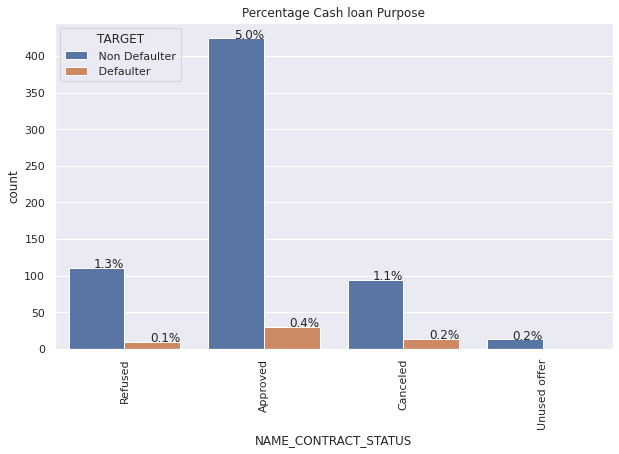

In [560]:
#Plotting a bar chart
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
total = float(len(New_pre_data.CODE_REJECT_REASON))
rej_type = sns.countplot(x ='NAME_CONTRACT_STATUS', hue="TARGET", data= Full_df)
plt.title('Percentage Cash loan Purpose')
plt.xticks(rotation = 90)
for p in rej_type.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()  
    rej_type.annotate(percentage, (x, y), ha='right')
plt.show()

* Out of those loans that are refused, only 0.1% were defaulters and 1.3% were non defaulters
* For those loans who were approved, only 0.4% were defaulters

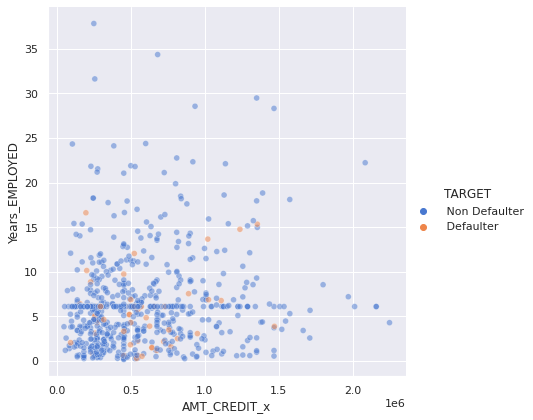

In [561]:
#Plotting a scatter plot
sns.relplot(x="AMT_CREDIT_x", y="Years_EMPLOYED", hue="TARGET", alpha=.5, palette="muted", height=6, data=Full_df)
plt.show()

* Currently defaulters mostly opted for 1.0 credit but tended to have worked for less 5 years.

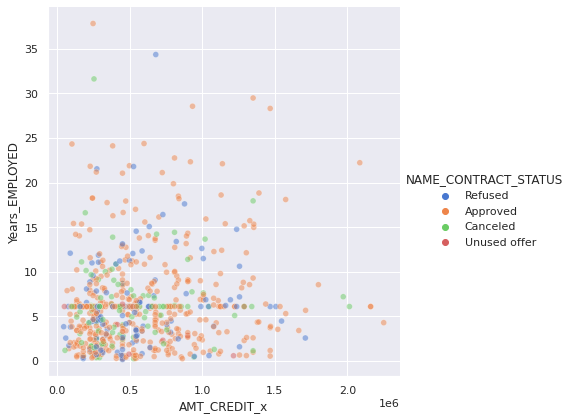

In [562]:
# plotting a scatter plot
sns.relplot(x="AMT_CREDIT_x", y="Years_EMPLOYED", hue="NAME_CONTRACT_STATUS", alpha=.5, palette="muted", height=6, data=Full_df)
plt.show()

* Those refused are found more densely to have worked for less than 5 years and opted for less than 0.5 % However, the refused ones are found outside these areas as well.

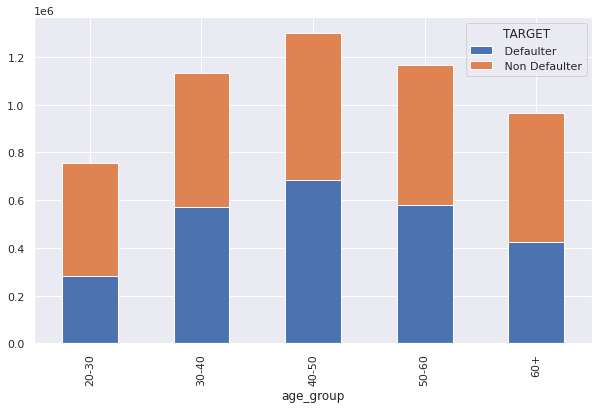

In [563]:
# Making a bar plot
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="age_group", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* In the current case those in the age group 40-50 were more credit but has the highest number of defaulters. Those in the age group 20-30 and 60+ took less loans but have the least amount of defaulters

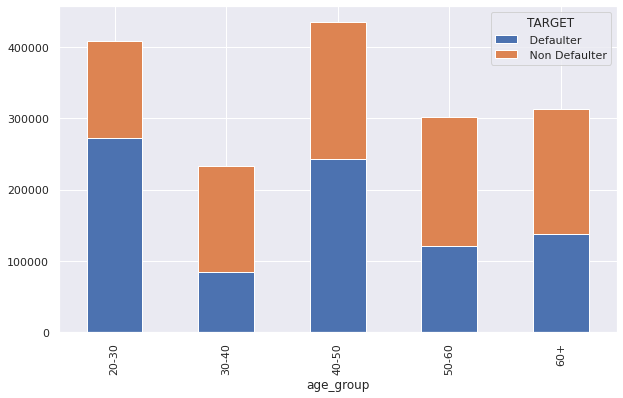

In [564]:
# Making a bar plot
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_y", index="age_group", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* In the previous data, the 20-30 had the highest number of defaulters while 40-50 also defaulted heavily. The 60+ age group are still the less likely to default on loans as show in this graph

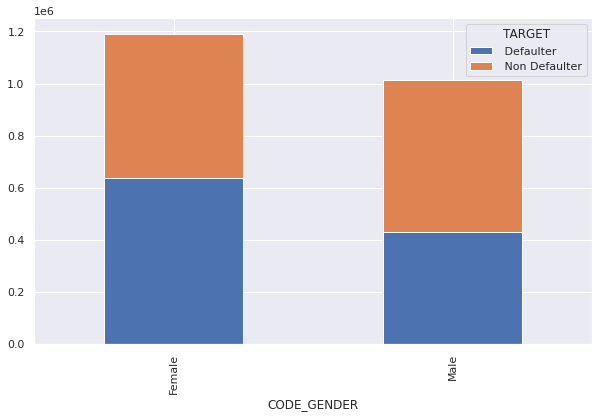

In [565]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="CODE_GENDER", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently less loans are given to males and less number of defaulters are found among them. Females have more defaulters.

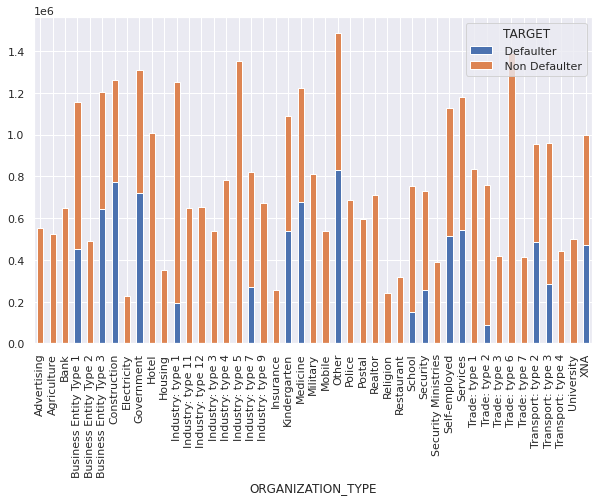

In [566]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="ORGANIZATION_TYPE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently those in Medicine, Kindergarten, Other, Government, Contruction, Business entity Type 3 and 1, tranport type 2 and those falling in XNA defaulted heavily.These risky organisations were also granted higher amount of loans.


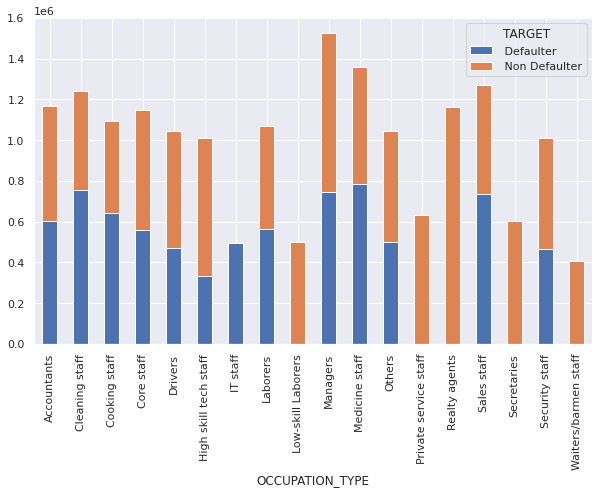

In [567]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="OCCUPATION_TYPE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently Medicine staff, managers, sales staff,labours, accountants, cleaning staff, cooking staff, core staff, security staff, others and IT staff tended to default on the credit. Among IT staff, all of them have defaulted. 
* No defaulters found in low-skill labours, private service staff  secretaries, waiters and barmen. These categories also opted for lower credit.

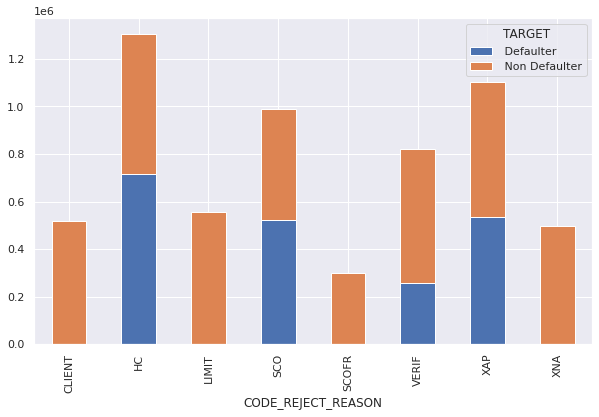

In [568]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="CODE_REJECT_REASON", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()


* Those rejected because of Client, limit, scofr and other unknown reason(XNA) had no defaulters. Those rejected due to lack of verification only had low amount of defaulters

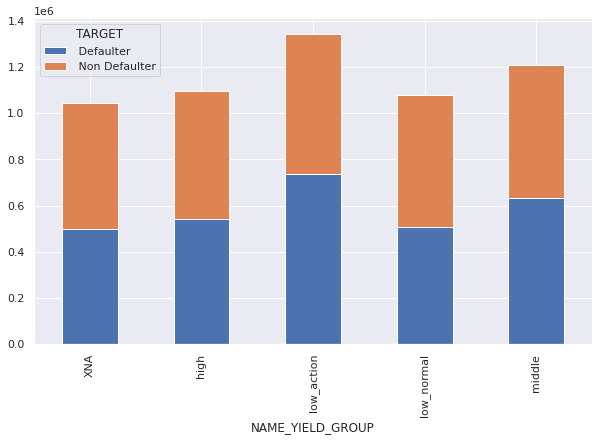

In [569]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_YIELD_GROUP", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Those come under low_action Interest rate Yield_Group opted for more credit and also defaulted the most.

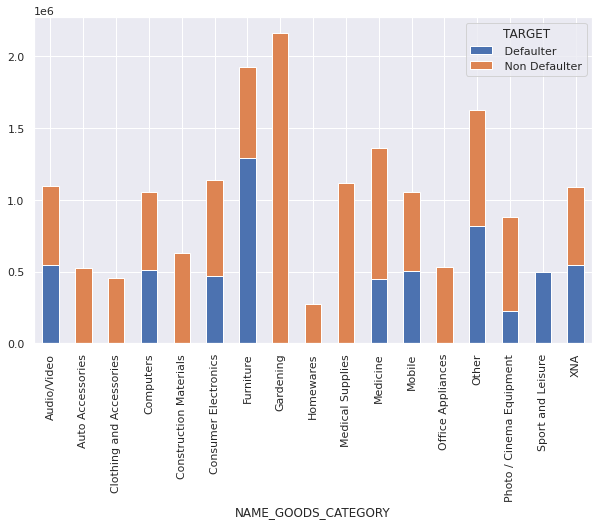

In [570]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_GOODS_CATEGORY", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently those in XNA(unknown) group, medicine, mobile, sport and leisure, audio/video, computers, consumer electronics, furniture and photo/cinema equipment have defaulters.
* Furniture category have the higest amount of defaulters and they have taken the second highest amount of credit.

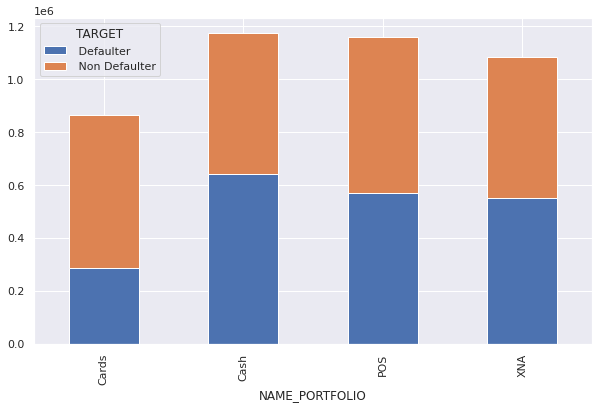

In [571]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_PORTFOLIO", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Those taking cash and pos on credit tend to dafault. Those falling in unknown category have high defaulters

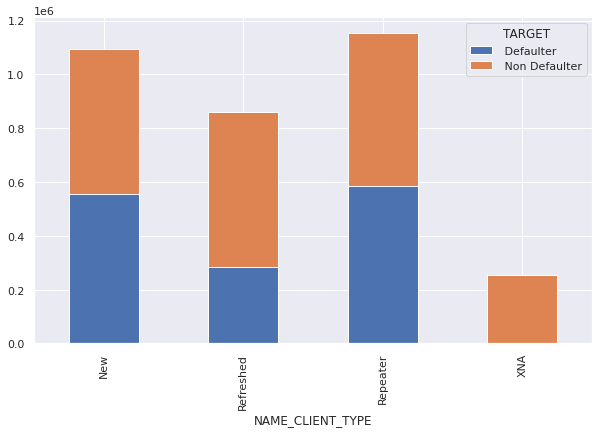

In [572]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_CLIENT_TYPE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently Repeater clients and New clients  take higher amount of credit and are more likely to default than refreshed clients.

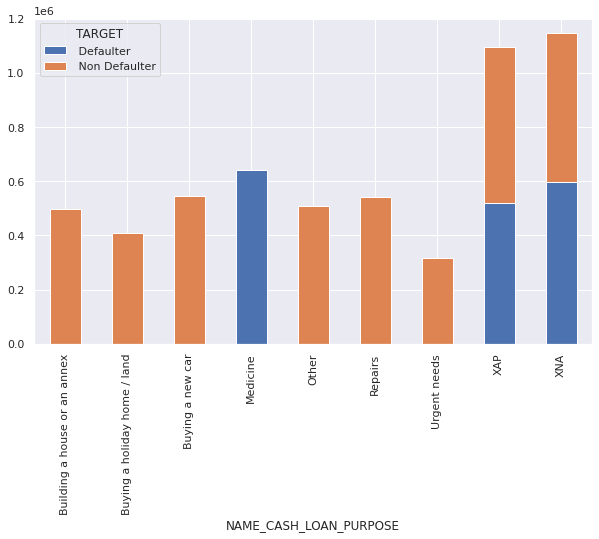

In [573]:
# making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_CASH_LOAN_PURPOSE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently those taking credit for Medicine, unknown purpose and miscellaneous purposes tend to default much more than other categories

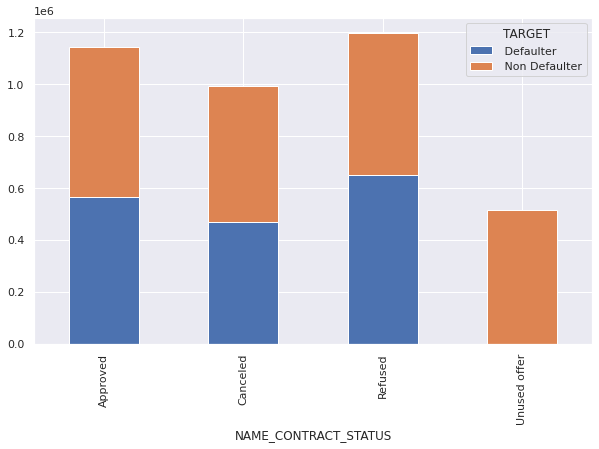

In [574]:
#Making a bar chart
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_CONTRACT_STATUS", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* We can see that Currently many of the non defaulters have been refused and many defaulter have been approved. Both the categories, approved and refused opt for high credit amount.

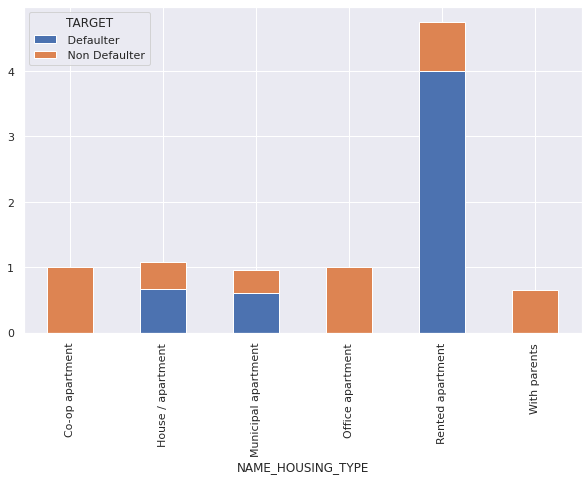

In [575]:
#Making a bar chart
data = pd.pivot_table(data=Full_df, values="CNT_CHILDREN", index="NAME_HOUSING_TYPE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently those in rented apartments tend to have 4 children are most likely to default on the loans.

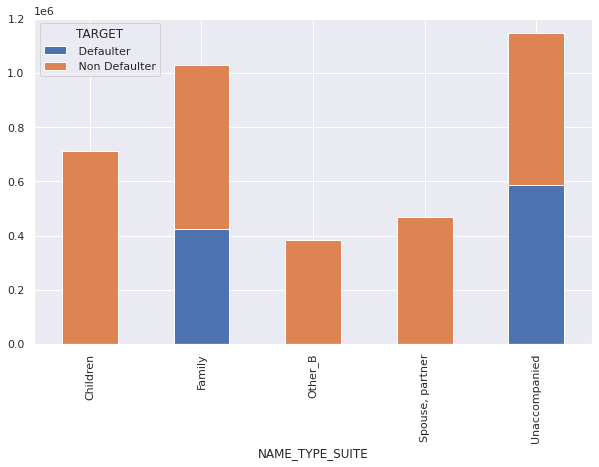

In [576]:
#making a bar chat 
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_TYPE_SUITE", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* Currently those with who come family and those who come alone opt the most credit. Those who come alone are most likely to default followed by those who come with family.

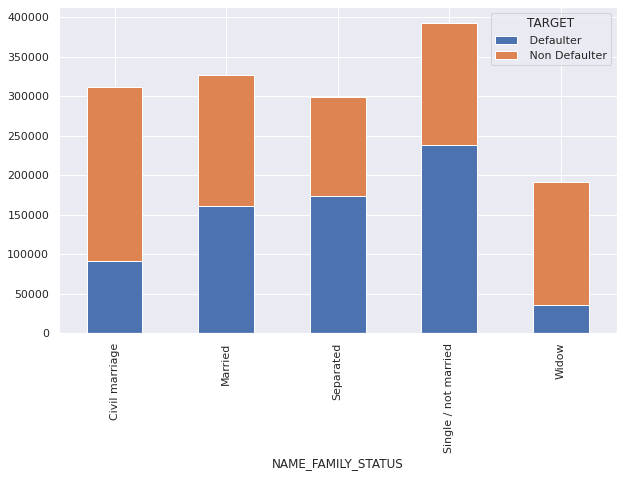

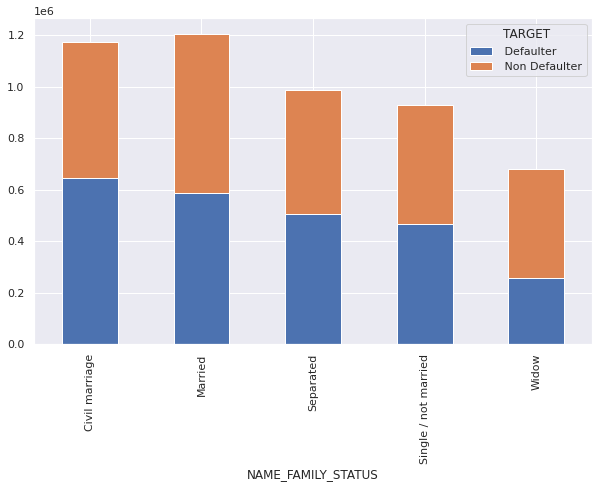

In [577]:
#making two bar chat , first with current credit amount and second with previous credit amount.
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_y", index="NAME_FAMILY_STATUS", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6] )
plt.show()
data = pd.pivot_table(data=Full_df, values="AMT_CREDIT_x", index="NAME_FAMILY_STATUS", columns="TARGET")
data.plot(kind="bar", stacked="True", figsize=[10,6] )
plt.show()

* The first bar chat  not married/ singles opted for loans the most, followed by married and civil married. the married, singles and separated defaulted much more.
* Second plot - In the current case, those who had civil marriages, and those who were married took out more loans, defaulted more. Singles, separated, widows opted for less loans, also defaulted less.